In [1]:
# !cd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Содержание <a id='Content'></a>

0. [Формат работы над проектом](#Work_format)     
1. [Описание задачи](#Task_description)
2. [Exploratory data analysis](#EDA)
3. [Список уточняющих вопросов](#Questions)
4. [Примерный план решения задачи](#Plan)
5. [Предобработка данных](#Data_preprocessing)
6. [Подготовка модели](#Model_training)
7. [Отчет о проделанной работе](#Report)

# 0. [Формат работы над проектом](#Content) <a id='Work_format'></a>

Процесс работы над проектом происходит поэтапно:
1. Ознакомление с данными.
2. Формирование списка вопросов. 
3. Создание плана дальнейшей работы.
4. Получение ответов (если есть) в ходе видеоконференции.
5. Далее идет предобработка данных и поиск решения. 

# 1. [Описание задачи](#Content) <a id='Task_description'></a>

Металлургический комбинат решает оптимизировать свои производственные расходы и уменьшить потребление энергии при обработке стали. Данная задача может быть решена путем использования модели, предсказывающей температуру стали от ряда параметров. 

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

# 2. [Exploratory Data Analysis](#Content) <a id='EDA'></a>

Импортируем библиотеки и читаем данные.

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
%matplotlib inline

In [6]:
common_path = os.getcwd() #Локальная машина

Изучим содержимое датасетов

###  Данные об электродах (data_arc.csv)

In [7]:
data_arc = pd.read_csv(common_path + r"/final_steel/data_arc.csv", parse_dates=[1,2])

In [8]:
def check_data(df):
    display("Размерность таблицы: " + str(df.shape))
    display(df.info())
    display(df.head())
    display(df.sample(10))

In [9]:
check_data(data_arc)

'Размерность таблицы: (14876, 5)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


None

key Начало нагрева дугой Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14 2019-05-03 11:06:02           0.976059   
1    1  2019-05-03 11:07:28 2019-05-03 11:10:33           0.805607   
2    1  2019-05-03 11:11:44 2019-05-03 11:14:36           0.744363   
3    1  2019-05-03 11:18:14 2019-05-03 11:24:19           1.659363   
4    1  2019-05-03 11:26:09 2019-05-03 11:28:37           0.692755   

   Реактивная мощность  
0             0.687084  
1             0.520285  
2             0.498805  
3             1.062669  
4             0.414397

key Начало нагрева дугой Конец нагрева дугой  Активная мощность  \
8028   1741  2019-07-04 02:58:54 2019-07-04 03:03:25           1.123782   
8292   1804  2019-07-06 10:52:56 2019-07-06 10:55:45           0.637422   
5963   1299  2019-06-19 06:25:52 2019-06-19 06:28:05           0.570045   
8719   1897  2019-07-09 21:32:51 2019-07-09 21:34:39           0.345973   
3141    681  2019-05-28 12:13:11 2019-05-28 12:15:25           0.597754   
1361    296  2019-05-14 10:30:24 2019-05-14 10:32:46           0.540991   
8354   1817  2019-07-06 23:36:45 2019-07-06 23:43:59           1.987684   
686     148  2019-05-08 22:01:30 2019-05-08 22:03:39           0.417127   
282      60  2019-05-05 13:08:14 2019-05-05 13:11:19           0.764225   
10878  2366  2019-08-01 06:56:50 2019-08-01 06:57:54           0.229650   

       Реактивная мощность  
8028              0.885728  
8292              0.487498  
5963              0.406539  
8719              0.292121  
3141              0.406205  
1361              0.445000  
8354              1.451240  
686               0.283487  
282               0.536844  
10878             0.216034

In [10]:
data_arc['key'].unique()

array([   1,    2,    3, ..., 3239, 3240, 3241], dtype=int64)

In [11]:
len(data_arc['key'].unique())

3214

"Ключи" повторяются, но при этом не все ключи представлены в диапазоне данных 3214 vs. 3241

In [12]:
(data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).describe()

count                     14876
mean     0 days 00:02:51.670946
std      0 days 00:01:38.186802
min             0 days 00:00:11
25%             0 days 00:01:47
50%             0 days 00:02:27
75%             0 days 00:03:34
max             0 days 00:15:07
dtype: object

Описание времени "нагрева дуг" говорят о небольших временных интервалах, в 50% случаев лежащих от полутора до 4 минут. 

In [13]:
(data_arc['Начало нагрева дугой'] - data_arc['Конец нагрева дугой'].shift(1)).describe()

count                     14875
mean     0 days 00:08:49.576941
std      0 days 01:00:55.719677
min           -1 days +18:25:25
25%             0 days 00:02:12
50%             0 days 00:04:11
75%             0 days 00:09:39
max             4 days 22:11:33
dtype: object

Медианное время между работой дуг составляет 4 минуты 11 секунд. Медианное время одного цикла нагрева 2 минуты 27 секунд. 
$$
147/251 = 0.58 (58%)
$$
примерно 58% времени идет нагрев электродами. 

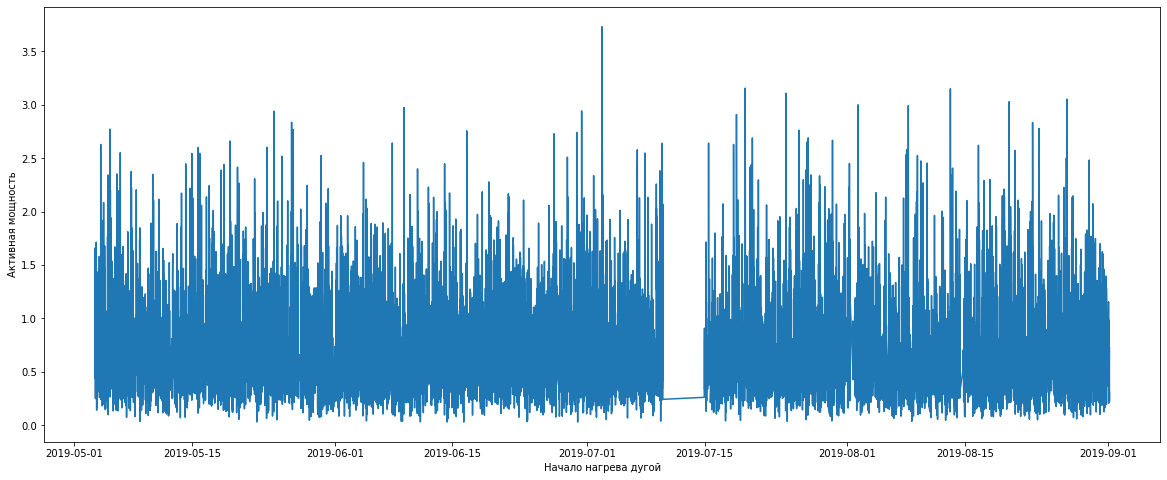

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x="Начало нагрева дугой", y="Активная мощность", data=data_arc)

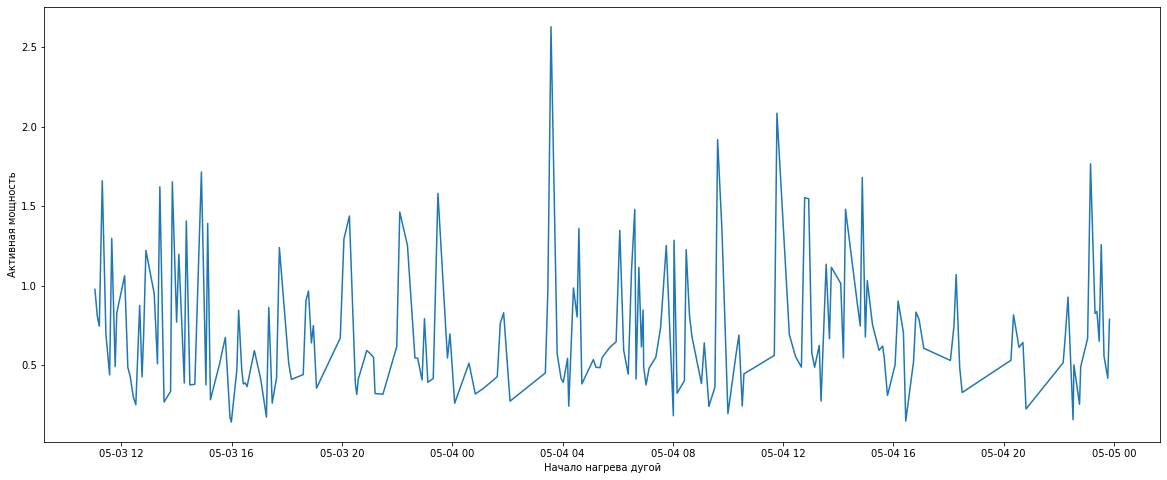

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x="Начало нагрева дугой", y="Активная мощность", data=data_arc.loc[data_arc['Начало нагрева дугой'] < '2019-05-05 00:00:00'])

In [16]:
(data_arc['Активная мощность']/(data_arc['Активная мощность'] + data_arc['Реактивная мощность'])).describe()

count    14876.000000
mean         0.573881
std          0.034449
min         -0.000693
25%          0.556952
50%          0.579140
75%          0.596870
max          0.660998
dtype: float64

In [17]:
data_arc['Процент активной мощности'] = (data_arc['Активная мощность']/(data_arc['Активная мощность'] + data_arc['Реактивная мощность']))

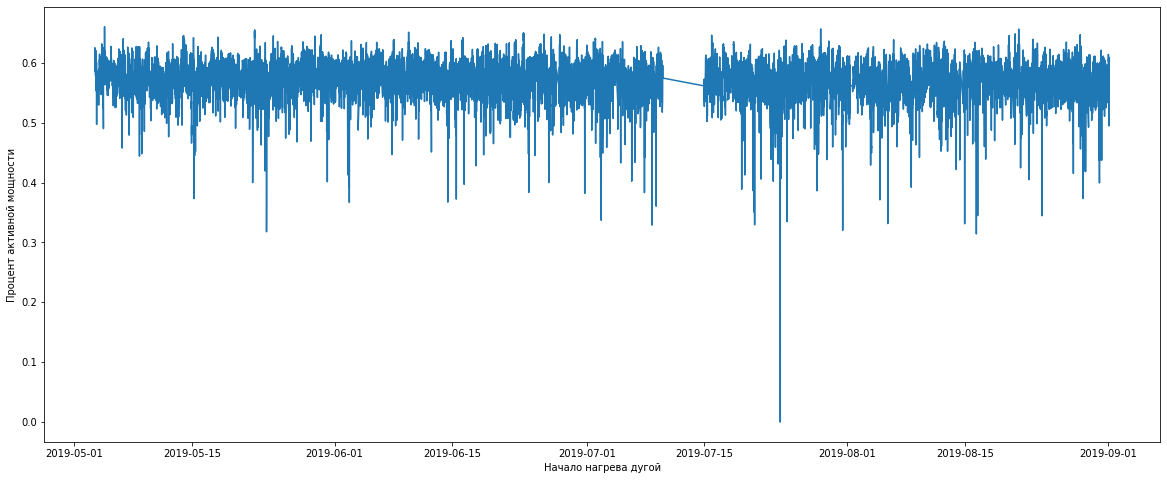

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x="Начало нагрева дугой", y="Процент активной мощности", data=data_arc)

Похоже доля активной мощности к общей лежит примерно в одном диапазоне 55-60%. Есть и отрицательные значения, которые вероятно являются выбросами. С ними стоит поработать. 


In [19]:
data_arc['Активная мощность'].describe()

count    14876.000000
mean         0.670441
std          0.408159
min          0.030002
25%          0.395297
50%          0.555517
75%          0.857034
max          3.731596
Name: Активная мощность, dtype: float64

А вот активная мощность задействуется совершенно разная!

Сет из себя набор данных, характерных для временных рядов. Каждая запись говорит о временном интервале и задействованной мощности. Поскольку завод платит за потребленную энергию, у нас мощность (общая) помноженная на время работы дуг - это основной показатель который мы оптимизируем.

### Данные о подаче сыпучих материалов (объём) (data_bulk.csv)

In [20]:
data_bulk = pd.read_csv(common_path + r"/final_steel/data_bulk.csv")

In [21]:
check_data(data_bulk)

'Размерность таблицы: (3129, 16)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN      NaN    203.0      NaN    151.0    152.0

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
2647  2748     NaN     NaN    64.0    58.0     NaN     NaN     NaN     NaN   
790    824    27.0     NaN   141.0     NaN     NaN     NaN     NaN     NaN   
79      91     NaN     NaN     NaN     NaN     NaN   106.0     NaN     NaN   
2986  3095     NaN     NaN    46.0     NaN     NaN     NaN     NaN     NaN   
736    770     NaN     NaN   121.0     NaN     NaN     NaN     NaN     NaN   
145    159     NaN     NaN     NaN     NaN     NaN    76.0     NaN     NaN   
1734  1795     NaN     NaN     NaN   135.0     NaN     NaN     NaN     NaN   
25      26     NaN     NaN    67.0     NaN     NaN     NaN     NaN     NaN   
1692  1752     NaN     NaN    83.0     NaN     NaN     NaN     NaN     NaN   
1172  1220     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
2647     NaN      NaN      NaN      NaN      NaN    102.0      NaN  
790      NaN      NaN      NaN    515.0      NaN    302.0    205.0  
79       NaN      NaN      NaN    255.0      NaN    126.0    204.0  
2986     NaN      NaN      NaN    306.0      NaN    130.0    210.0  
736      NaN     75.0      NaN    206.0      NaN    105.0    204.0  
145      NaN      NaN      NaN      NaN      NaN    156.0      NaN  
1734     NaN      NaN      NaN    256.0      NaN    119.0    204.0  
25       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1692     NaN      NaN      NaN    207.0      NaN    348.0    203.0  
1172     NaN      NaN      NaN    256.0      NaN    107.0    102.0

В данных о подаче сыпучих материалов имеется большое количество пропусков. По сути они эквивалентны нулю (ничего не добавляем). Есть также признак "key" как и в `data_arc.csv`. Вероятно он имеет отношение к одной "плавке".

Хочется обатить внимание, что число данных о сыпучих материалах меньше числа уникальных ключей по нагреву электродов. Вроде как есть "ключи" без добавок

### Данные о подаче сыпучих материалов (время)(data_bulk_time.csv)

In [22]:
data_bulk_time = pd.read_csv(common_path + r"/final_steel/data_bulk_time.csv",parse_dates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [23]:
check_data(data_bulk_time)

'Размерность таблицы: (3129, 16)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


None

key Bulk 1 Bulk 2 Bulk 3              Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaT    NaT    NaT 2019-05-03 11:21:30    NaT    NaT    NaT    NaT   
1    2    NaT    NaT    NaT 2019-05-03 11:46:38    NaT    NaT    NaT    NaT   
2    3    NaT    NaT    NaT 2019-05-03 12:31:06    NaT    NaT    NaT    NaT   
3    4    NaT    NaT    NaT 2019-05-03 12:48:43    NaT    NaT    NaT    NaT   
4    5    NaT    NaT    NaT 2019-05-03 13:18:50    NaT    NaT    NaT    NaT   

  Bulk 9 Bulk 10 Bulk 11             Bulk 12 Bulk 13             Bulk 14  \
0    NaT     NaT     NaT 2019-05-03 11:03:52     NaT 2019-05-03 11:03:52   
1    NaT     NaT     NaT 2019-05-03 11:40:20     NaT 2019-05-03 11:40:20   
2    NaT     NaT     NaT 2019-05-03 12:09:40     NaT 2019-05-03 12:09:40   
3    NaT     NaT     NaT 2019-05-03 12:41:24     NaT 2019-05-03 12:41:24   
4    NaT     NaT     NaT 2019-05-03 13:12:56     NaT 2019-05-03 13:12:56   

              Bulk 15  
0 2019-05-03 11:03:52  
1 2019-05-03 11:40:20  
2 2019-05-03 12:09:40  
3 2019-05-03 12:41:24  
4 2019-05-03 13:12:56

key              Bulk 1 Bulk 2              Bulk 3              Bulk 4  \
1135  1183                 NaT    NaT                 NaT                 NaT   
1930  1996                 NaT    NaT 2019-07-19 15:12:21                 NaT   
2002  2073                 NaT    NaT                 NaT                 NaT   
1658  1718                 NaT    NaT                 NaT                 NaT   
1562  1620                 NaT    NaT                 NaT                 NaT   
859    895                 NaT    NaT                 NaT 2019-06-05 08:59:59   
1206  1255 2019-06-17 18:27:52    NaT                 NaT 2019-06-17 18:38:41   
1445  1499                 NaT    NaT                 NaT 2019-06-26 09:56:40   
1283  1335                 NaT    NaT 2019-06-20 07:39:02                 NaT   
2813  2919                 NaT    NaT                 NaT 2019-08-21 10:27:15   

     Bulk 5              Bulk 6 Bulk 7 Bulk 8 Bulk 9             Bulk 10  \
1135    NaT 2019-06-15 06:29:37    NaT    NaT    NaT                 NaT   
1930    NaT                 NaT    NaT    NaT    NaT                 NaT   
2002    NaT                 NaT    NaT    NaT    NaT                 NaT   
1658    NaT                 NaT    NaT    NaT    NaT 2019-07-03 11:21:16   
1562    NaT                 NaT    NaT    NaT    NaT                 NaT   
859     NaT                 NaT    NaT    NaT    NaT                 NaT   
1206    NaT                 NaT    NaT    NaT    NaT                 NaT   
1445    NaT                 NaT    NaT    NaT    NaT                 NaT   
1283    NaT                 NaT    NaT    NaT    NaT                 NaT   
2813    NaT                 NaT    NaT    NaT    NaT                 NaT   

                 Bulk 11             Bulk 12 Bulk 13             Bulk 14  \
1135 2019-06-15 06:29:37 2019-06-15 06:23:11     NaT 2019-06-15 06:23:11   
1930                 NaT                 NaT     NaT                 NaT   
2002                 NaT 2019-07-22 08:38:11     NaT 2019-07-22 08:38:11   
1658                 NaT                 NaT     NaT                 NaT   
1562                 NaT 2019-06-30 11:52:59     NaT 2019-06-30 11:52:59   
859                  NaT                 NaT     NaT                 NaT   
1206                 NaT 2019-06-17 18:24:47     NaT 2019-06-17 18:24:47   
1445                 NaT 2019-06-26 09:49:18     NaT 2019-06-26 09:49:18   
1283                 NaT 2019-06-20 07:30:05     NaT 2019-06-20 07:30:05   
2813                 NaT 2019-08-21 10:18:56     NaT 2019-08-21 10:18:56   

                 Bulk 15  
1135 2019-06-15 06:23:11  
1930                 NaT  
2002 2019-07-22 08:38:11  
1658                 NaT  
1562 2019-06-30 11:52:59  
859                  NaT  
1206                 NaT  
1445 2019-06-26 09:49:18  
1283 2019-06-20 07:30:05  
2813 2019-08-21 10:18:56

Таблица похоже представляет данные, когда какая добавка была внесена. Следует отдельно проверить указанное время сопоставив его с временным диапазоном по "ключу" плавки. 

### Данные о продувке стали газом (data_gas.csv)

In [24]:
data_gas = pd.read_csv(common_path + r"/final_steel/data_gas.csv")

In [25]:
check_data(data_gas)

'Размерность таблицы: (3239, 2)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692

key      Газ 1
550    553  21.034558
406    409   7.497763
688    691  15.488043
2943  2946   5.917813
991    994   6.297685
3011  3014   5.908432
1212  1215   7.554093
1558  1561  10.538792
136    137   8.165896
1797  1800   6.498219

In [26]:
len(data_gas.key.unique())

3239

In [27]:
data_gas['Газ 1'].describe()

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Газ 1, dtype: float64

Судя по числу ключей, часть данных окажется лишней, поскольку в `data_arc.csv` представлено меньшее количество ключей. В остальном вопросов нет. 

Отметим, что отсутствует также время конкретной продувки. 

### Результаты измерения температуры (data_temp.csv)

In [28]:
data_temp = pd.read_csv(common_path + r"/final_steel/data_temp.csv",parse_dates = [1])

In [29]:
check_data(data_temp)

'Размерность таблицы: (15907, 3)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


None

key        Время замера  Температура
0    1 2019-05-03 11:16:18       1571.0
1    1 2019-05-03 11:25:53       1604.0
2    1 2019-05-03 11:29:11       1618.0
3    1 2019-05-03 11:30:01       1601.0
4    1 2019-05-03 11:30:39       1613.0

key        Время замера  Температура
2850    552 2019-05-23 21:25:21       1561.0
12811  2606 2019-08-09 21:43:17          NaN
15767  3211 2019-08-31 04:42:33          NaN
13644  2775 2019-08-16 03:31:34          NaN
9771   1980 2019-07-18 22:18:46       1601.0
11387  2319 2019-07-30 15:51:01       1591.0
525      92 2019-05-06 14:58:26       1587.0
2592    494 2019-05-21 18:27:49       1576.0
8480   1725 2019-07-03 16:56:59       1586.0
6518   1318 2019-06-19 18:48:09       1596.0

In [30]:
len(data_temp.key.unique())

3216

Похоже как и с газом, число уникальных значений ключей больше числа значений ключей в данных об электродах.

Далее отдельно проверим указанное время сопоставив его с временным диапазоном по "ключу" плавки. 

In [31]:
(data_temp['Время замера'] - data_temp['Время замера'].shift(1)).describe()

count                     15906
mean     0 days 00:10:55.759461
std      0 days 00:58:53.388081
min           -1 days +18:28:22
25%             0 days 00:04:09
50%             0 days 00:07:56
75%             0 days 00:12:59
max             4 days 22:11:08
Name: Время замера, dtype: object

Медианное время между замерами температуры составляет 8 минут. 

Таблица описывающая замеры температуры важна в целом, поскольку скорее всего является триггером на запуск нагрева дуг и их отключения. 

Стоит также сопоставить время согласно "ключам" с данными об электродах. 

In [32]:
data_temp.Температура.describe()

count    13006.000000
mean      1591.840920
std         21.375851
min       1191.000000
25%       1581.000000
50%       1591.000000
75%       1601.000000
max       1705.000000
Name: Температура, dtype: float64

Достаточно небольшие стандартные отклонения свидетельствуют о важности температуры для техпроцесса выплавки.

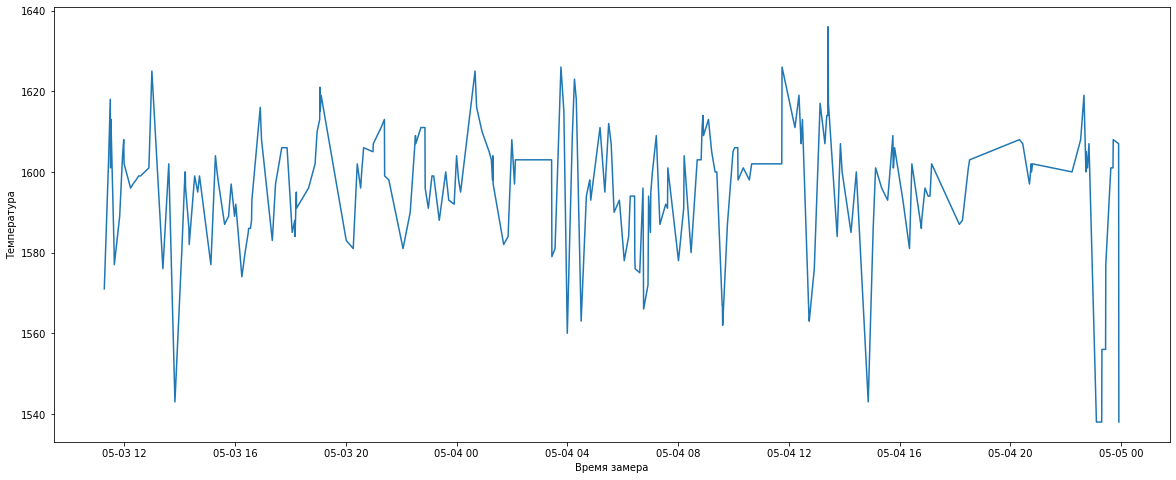

In [33]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x="Время замера", y="Температура", data=data_temp.loc[data_temp['Время замера'] < '2019-05-05 00:00:00'])

### Данные о проволочных материалах (объём)(data_wire.csv)

In [34]:
data_wire = pd.read_csv(common_path + r"/final_steel/data_wire.csv")

In [35]:
check_data(data_wire)

'Размерность таблицы: (3081, 10)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5  89.238236  9.11456     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

key      Wire 1     Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  \
2020  2118   95.047676        NaN     NaN     NaN     NaN     NaN     NaN   
326    352   61.120800        NaN     NaN     NaN     NaN     NaN     NaN   
1660  1740  131.133606        NaN     NaN     NaN     NaN     NaN     NaN   
2619  2753   54.119516  60.229519     NaN     NaN     NaN     NaN     NaN   
367    399   97.110001        NaN     NaN     NaN     NaN     NaN     NaN   
997   1057  145.033187        NaN     NaN     NaN     NaN     NaN     NaN   
2479  2606  181.403040        NaN     NaN     NaN     NaN     NaN     NaN   
1924  2019  121.168319        NaN     NaN     NaN     NaN     NaN     NaN   
1552  1631   56.066399  60.108879     NaN     NaN     NaN     NaN     NaN   
1910  2004  118.110718        NaN     NaN     NaN     NaN     NaN     NaN   

      Wire 8  Wire 9  
2020     NaN     NaN  
326      NaN     NaN  
1660     NaN     NaN  
2619     NaN     NaN  
367      NaN     NaN  
997      NaN     NaN  
2479     NaN     NaN  
1924     NaN     NaN  
1552     NaN     NaN  
1910     NaN     NaN

In [36]:
len(data_wire.key.unique())

3081

Данные о проволочных материалах практически полностью аналогичны данным о сыпучих материалах. Выводы аналогичны.

Судя по количеству уникальных ключей добавки проволоки производились не в каждую плавку. 

### Данные о проволочных материалах (время)(data_wire_time.csv)

In [37]:
data_wire_time = pd.read_csv(common_path + r"/final_steel/data_wire_time.csv",parse_dates = [1,2,3,4,5,6,7,8,9])

In [38]:
check_data(data_wire_time)

'Размерность таблицы: (3081, 10)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


None

key              Wire 1              Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1 2019-05-03 11:11:41                 NaT    NaT    NaT    NaT    NaT   
1    2 2019-05-03 11:46:10                 NaT    NaT    NaT    NaT    NaT   
2    3 2019-05-03 12:13:47                 NaT    NaT    NaT    NaT    NaT   
3    4 2019-05-03 12:48:05                 NaT    NaT    NaT    NaT    NaT   
4    5 2019-05-03 13:18:15 2019-05-03 13:32:06    NaT    NaT    NaT    NaT   

  Wire 7 Wire 8 Wire 9  
0    NaT    NaT    NaT  
1    NaT    NaT    NaT  
2    NaT    NaT    NaT  
3    NaT    NaT    NaT  
4    NaT    NaT    NaT

key              Wire 1              Wire 2 Wire 3 Wire 4 Wire 5  \
2826  2979 2019-08-23 13:44:11                 NaT    NaT    NaT    NaT   
307    333 2019-05-15 20:38:12                 NaT    NaT    NaT    NaT   
1852  1942 2019-07-17 02:14:53                 NaT    NaT    NaT    NaT   
2770  2923 2019-08-21 12:51:56 2019-08-21 12:52:49    NaT    NaT    NaT   
1460  1536 2019-06-27 21:51:44 2019-06-27 21:52:39    NaT    NaT    NaT   
85     100 2019-05-06 20:18:13                 NaT    NaT    NaT    NaT   
1137  1205 2019-06-16 00:24:14                 NaT    NaT    NaT    NaT   
1724  1811 2019-07-06 18:22:32                 NaT    NaT    NaT    NaT   
1239  1308 2019-06-19 13:03:50 2019-06-19 13:14:56    NaT    NaT    NaT   
635    671 2019-05-28 03:51:48                 NaT    NaT    NaT    NaT   

     Wire 6 Wire 7 Wire 8 Wire 9  
2826    NaT    NaT    NaT    NaT  
307     NaT    NaT    NaT    NaT  
1852    NaT    NaT    NaT    NaT  
2770    NaT    NaT    NaT    NaT  
1460    NaT    NaT    NaT    NaT  
85      NaT    NaT    NaT    NaT  
1137    NaT    NaT    NaT    NaT  
1724    NaT    NaT    NaT    NaT  
1239    NaT    NaT    NaT    NaT  
635     NaT    NaT    NaT    NaT

Данные полностью идентичны `data_wire.csv`, когда какая проволока была внесена. Также стоит проверить указанное время сопоставив его с временным диапазоном по "ключу" плавки.

## Сопоставление временных интервалов и ключей из разных наборов таблиц

Как было написано выше, часть таблиц увязана между собой по времени и ключам одновременно. Это таблицы:
- data_wire_time
- data_temp
- data_bulk_time
- data_arc 

Стоит проверить, все ли данные соответствуют друг-другу: 
1. Значения "добавок" заполнены в тех же ячейках, что и время описания. 
2. Временные интервалы ключей и соответствующие им события находятся в одном временном диапазоне. 
3. Проверить данные на пропуски. 

In [39]:
key_grouped_data = data_arc[['key','Начало нагрева дугой']].groupby('key').min()
key_grouped_data = key_grouped_data.merge(data_arc[['key','Конец нагрева дугой']].groupby('key').max(), left_index = True, right_index = True)
key_grouped_data

Начало нагрева дугой Конец нагрева дугой
key                                          
1     2019-05-03 11:02:14 2019-05-03 11:28:37
2     2019-05-03 11:34:14 2019-05-03 11:53:18
3     2019-05-03 12:06:54 2019-05-03 12:32:19
4     2019-05-03 12:39:37 2019-05-03 12:57:50
5     2019-05-03 13:11:13 2019-05-03 13:33:55
...                   ...                 ...
3237  2019-08-31 22:41:18 2019-08-31 23:03:48
3238  2019-08-31 23:26:18 2019-08-31 23:41:28
3239  2019-09-01 01:26:53 2019-09-01 02:15:43
3240  2019-09-01 02:35:24 2019-09-01 03:34:08
3241  2019-09-01 03:58:58 2019-09-01 04:36:08

[3214 rows x 2 columns]

Данные из data_arc сгруппированы и выделены диапазоны начала и конца нагрева. Добавим теперь сюда данные о температуре и времени добавок. 

In [40]:
key_grouped_data = key_grouped_data.merge(data_temp.groupby('key')['Время замера'].aggregate(['min','max']), 
                       how = 'left' ,left_index = True, right_index = True)

In [41]:
key_grouped_data

Начало нагрева дугой Конец нагрева дугой                 min  \
key                                                                 
1     2019-05-03 11:02:14 2019-05-03 11:28:37 2019-05-03 11:16:18   
2     2019-05-03 11:34:14 2019-05-03 11:53:18 2019-05-03 11:37:27   
3     2019-05-03 12:06:54 2019-05-03 12:32:19 2019-05-03 12:13:17   
4     2019-05-03 12:39:37 2019-05-03 12:57:50 2019-05-03 12:52:57   
5     2019-05-03 13:11:13 2019-05-03 13:33:55 2019-05-03 13:23:19   
...                   ...                 ...                 ...   
3237  2019-08-31 22:41:18 2019-08-31 23:03:48 2019-08-31 22:44:04   
3238  2019-08-31 23:26:18 2019-08-31 23:41:28 2019-08-31 23:30:31   
3239  2019-09-01 01:26:53 2019-09-01 02:15:43 2019-09-01 01:31:47   
3240  2019-09-01 02:35:24 2019-09-01 03:34:08 2019-09-01 02:39:01   
3241  2019-09-01 03:58:58 2019-09-01 04:36:08 2019-09-01 04:03:30   

                     max  
key                       
1    2019-05-03 11:30:39  
2    2019-05-03 11:59:12  
3    2019-05-03 12:34:57  
4    2019-05-03 12:59:25  
5    2019-05-03 13:36:01  
...                  ...  
3237 2019-08-31 23:05:43  
3238 2019-08-31 23:43:00  
3239 2019-09-01 02:24:15  
3240 2019-09-01 03:35:16  
3241 2019-09-01 04:38:08  

[3214 rows x 4 columns]

In [42]:
data_bulk_time

key Bulk 1 Bulk 2              Bulk 3              Bulk 4 Bulk 5  \
0        1    NaT    NaT                 NaT 2019-05-03 11:21:30    NaT   
1        2    NaT    NaT                 NaT 2019-05-03 11:46:38    NaT   
2        3    NaT    NaT                 NaT 2019-05-03 12:31:06    NaT   
3        4    NaT    NaT                 NaT 2019-05-03 12:48:43    NaT   
4        5    NaT    NaT                 NaT 2019-05-03 13:18:50    NaT   
...    ...    ...    ...                 ...                 ...    ...   
3124  3237    NaT    NaT 2019-08-31 22:51:28                 NaT    NaT   
3125  3238    NaT    NaT 2019-08-31 23:39:11                 NaT    NaT   
3126  3239    NaT    NaT                 NaT                 NaT    NaT   
3127  3240    NaT    NaT                 NaT                 NaT    NaT   
3128  3241    NaT    NaT                 NaT                 NaT    NaT   

                  Bulk 6 Bulk 7 Bulk 8 Bulk 9 Bulk 10 Bulk 11  \
0                    NaT    NaT    NaT    NaT     NaT     NaT   
1                    NaT    NaT    NaT    NaT     NaT     NaT   
2                    NaT    NaT    NaT    NaT     NaT     NaT   
3                    NaT    NaT    NaT    NaT     NaT     NaT   
4                    NaT    NaT    NaT    NaT     NaT     NaT   
...                  ...    ...    ...    ...     ...     ...   
3124                 NaT    NaT    NaT    NaT     NaT     NaT   
3125                 NaT    NaT    NaT    NaT     NaT     NaT   
3126 2019-09-01 01:51:58    NaT    NaT    NaT     NaT     NaT   
3127 2019-09-01 03:12:40    NaT    NaT    NaT     NaT     NaT   
3128                 NaT    NaT    NaT    NaT     NaT     NaT   

                 Bulk 12 Bulk 13             Bulk 14             Bulk 15  
0    2019-05-03 11:03:52     NaT 2019-05-03 11:03:52 2019-05-03 11:03:52  
1    2019-05-03 11:40:20     NaT 2019-05-03 11:40:20 2019-05-03 11:40:20  
2    2019-05-03 12:09:40     NaT 2019-05-03 12:09:40 2019-05-03 12:09:40  
3    2019-05-03 12:41:24     NaT 2019-05-03 12:41:24 2019-05-03 12:41:24  
4    2019-05-03 13:12:56     NaT 2019-05-03 13:12:56 2019-05-03 13:12:56  
...                  ...     ...                 ...                 ...  
3124 2019-08-31 22:46:52     NaT 2019-08-31 22:46:52 2019-08-31 22:46:52  
3125 2019-08-31 23:33:09     NaT 2019-08-31 23:33:09 2019-08-31 23:33:09  
3126 2019-09-01 01:39:41     NaT 2019-09-01 01:33:25 2019-09-01 01:33:25  
3127                 NaT     NaT 2019-09-01 02:41:27 2019-09-01 02:41:27  
3128                 NaT     NaT 2019-09-01 04:05:34 2019-09-01 04:05:34  

[3129 rows x 16 columns]

In [43]:
key_grouped_data = key_grouped_data.merge(data_bulk_time.groupby('key').first(), how = 'left' ,left_index = True, right_index = True)
key_grouped_data = key_grouped_data.merge(data_wire_time.groupby('key').first(), how = 'left' ,left_index = True, right_index = True)

In [44]:
key_grouped_data

Начало нагрева дугой Конец нагрева дугой                 min  \
key                                                                 
1     2019-05-03 11:02:14 2019-05-03 11:28:37 2019-05-03 11:16:18   
2     2019-05-03 11:34:14 2019-05-03 11:53:18 2019-05-03 11:37:27   
3     2019-05-03 12:06:54 2019-05-03 12:32:19 2019-05-03 12:13:17   
4     2019-05-03 12:39:37 2019-05-03 12:57:50 2019-05-03 12:52:57   
5     2019-05-03 13:11:13 2019-05-03 13:33:55 2019-05-03 13:23:19   
...                   ...                 ...                 ...   
3237  2019-08-31 22:41:18 2019-08-31 23:03:48 2019-08-31 22:44:04   
3238  2019-08-31 23:26:18 2019-08-31 23:41:28 2019-08-31 23:30:31   
3239  2019-09-01 01:26:53 2019-09-01 02:15:43 2019-09-01 01:31:47   
3240  2019-09-01 02:35:24 2019-09-01 03:34:08 2019-09-01 02:39:01   
3241  2019-09-01 03:58:58 2019-09-01 04:36:08 2019-09-01 04:03:30   

                     max Bulk 1 Bulk 2              Bulk 3  \
key                                                          
1    2019-05-03 11:30:39    NaT    NaT                 NaT   
2    2019-05-03 11:59:12    NaT    NaT                 NaT   
3    2019-05-03 12:34:57    NaT    NaT                 NaT   
4    2019-05-03 12:59:25    NaT    NaT                 NaT   
5    2019-05-03 13:36:01    NaT    NaT                 NaT   
...                  ...    ...    ...                 ...   
3237 2019-08-31 23:05:43    NaT    NaT 2019-08-31 22:51:28   
3238 2019-08-31 23:43:00    NaT    NaT 2019-08-31 23:39:11   
3239 2019-09-01 02:24:15    NaT    NaT                 NaT   
3240 2019-09-01 03:35:16    NaT    NaT                 NaT   
3241 2019-09-01 04:38:08    NaT    NaT                 NaT   

                  Bulk 4 Bulk 5              Bulk 6  ...             Bulk 15  \
key                                                  ...                       
1    2019-05-03 11:21:30    NaT                 NaT  ... 2019-05-03 11:03:52   
2    2019-05-03 11:46:38    NaT                 NaT  ... 2019-05-03 11:40:20   
3    2019-05-03 12:31:06    NaT                 NaT  ... 2019-05-03 12:09:40   
4    2019-05-03 12:48:43    NaT                 NaT  ... 2019-05-03 12:41:24   
5    2019-05-03 13:18:50    NaT                 NaT  ... 2019-05-03 13:12:56   
...                  ...    ...                 ...  ...                 ...   
3237                 NaT    NaT                 NaT  ... 2019-08-31 22:46:52   
3238                 NaT    NaT                 NaT  ... 2019-08-31 23:33:09   
3239                 NaT    NaT 2019-09-01 01:51:58  ... 2019-09-01 01:33:25   
3240                 NaT    NaT 2019-09-01 03:12:40  ... 2019-09-01 02:41:27   
3241                 NaT    NaT                 NaT  ... 2019-09-01 04:05:34   

                  Wire 1              Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
key                                                                        
1    2019-05-03 11:11:41                 NaT    NaT    NaT    NaT    NaT   
2    2019-05-03 11:46:10                 NaT    NaT    NaT    NaT    NaT   
3    2019-05-03 12:13:47                 NaT    NaT    NaT    NaT    NaT   
4    2019-05-03 12:48:05                 NaT    NaT    NaT    NaT    NaT   
5    2019-05-03 13:18:15 2019-05-03 13:32:06    NaT    NaT    NaT    NaT   
...                  ...                 ...    ...    ...    ...    ...   
3237 2019-08-31 22:50:20                 NaT    NaT    NaT    NaT    NaT   
3238 2019-08-31 23:38:24                 NaT    NaT    NaT    NaT    NaT   
3239 2019-09-01 01:50:43                 NaT    NaT    NaT    NaT    NaT   
3240 2019-09-01 03:12:02                 NaT    NaT    NaT    NaT    NaT   
3241 2019-09-01 04:16:01                 NaT    NaT    NaT    NaT    NaT   

     Wire 7 Wire 8 Wire 9  
key                        
1       NaT    NaT    NaT  
2       NaT    NaT    NaT  
3       NaT    NaT    NaT  
4       NaT    NaT    NaT  
5       NaT    NaT    NaT  
...     ...    ...    ...  
3237    NaT    NaT    NaT  
3238    NaT    NaT

Получили сгруппированные временные данные. 

In [45]:
columns = key_grouped_data.drop(columns = ['Начало нагрева дугой','Конец нагрева дугой']).columns

In [46]:
df_check_matrix = key_grouped_data[['Начало нагрева дугой','Конец нагрева дугой']]
for col in columns:
    seq_compare_result = pd.Series((((key_grouped_data['Конец нагрева дугой'] < key_grouped_data[col]) | 
                          (key_grouped_data['Начало нагрева дугой'] > key_grouped_data[col])) & (key_grouped_data[col].notna())),name = col)
#     display(seq_compare_result)
    df_check_matrix = df_check_matrix.merge(seq_compare_result ,left_index = True, right_index = True)
    
df_check_matrix

Начало нагрева дугой Конец нагрева дугой    min   max  Bulk 1  Bulk 2  \
key                                                                          
1     2019-05-03 11:02:14 2019-05-03 11:28:37  False  True   False   False   
2     2019-05-03 11:34:14 2019-05-03 11:53:18  False  True   False   False   
3     2019-05-03 12:06:54 2019-05-03 12:32:19  False  True   False   False   
4     2019-05-03 12:39:37 2019-05-03 12:57:50  False  True   False   False   
5     2019-05-03 13:11:13 2019-05-03 13:33:55  False  True   False   False   
...                   ...                 ...    ...   ...     ...     ...   
3237  2019-08-31 22:41:18 2019-08-31 23:03:48  False  True   False   False   
3238  2019-08-31 23:26:18 2019-08-31 23:41:28  False  True   False   False   
3239  2019-09-01 01:26:53 2019-09-01 02:15:43  False  True   False   False   
3240  2019-09-01 02:35:24 2019-09-01 03:34:08  False  True   False   False   
3241  2019-09-01 03:58:58 2019-09-01 04:36:08  False  True   False   False   

      Bulk 3  Bulk 4  Bulk 5  Bulk 6  ...  Bulk 15  Wire 1  Wire 2  Wire 3  \
key                                   ...                                    
1      False   False   False   False  ...    False   False   False   False   
2      False   False   False   False  ...    False   False   False   False   
3      False   False   False   False  ...    False   False   False   False   
4      False   False   False   False  ...    False   False   False   False   
5      False   False   False   False  ...    False   False   False   False   
...      ...     ...     ...     ...  ...      ...     ...     ...     ...   
3237   False   False   False   False  ...    False   False   False   False   
3238   False   False   False   False  ...    False   False   False   False   
3239   False   False   False   False  ...    False   False   False   False   
3240   False   False   False   False  ...    False   False   False   False   
3241   False   False   False   False  ...    False   False   False   False   

      Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  Wire 9  
key                                                   
1      False   False   False   False   False   False  
2      False   False   False   False   False   False  
3      False   False   False   False   False   False  
4      False   False   False   False   False   False  
5      False   False   False   False   False   False  
...      ...     ...     ...     ...     ...     ...  
3237   False   False   False   False   False   False  
3238   False   False   False   False   False   False  
3239   False   False   False   False   False   False  
3240   False   False   False   False   False   False  
3241   False   False   False   False   False   False  

[3214 rows x 28 columns]

In [47]:
df_check_matrix.sum()

min          89
max        3045
Bulk 1        3
Bulk 2        0
Bulk 3       65
Bulk 4       60
Bulk 5        1
Bulk 6       29
Bulk 7        0
Bulk 8        0
Bulk 9        0
Bulk 10       9
Bulk 11      11
Bulk 12       3
Bulk 13       0
Bulk 14       4
Bulk 15       3
Wire 1      139
Wire 2       76
Wire 3       24
Wire 4        0
Wire 5        0
Wire 6        2
Wire 7        4
Wire 8        0
Wire 9        3
dtype: int64

In [48]:
key_grouped_data[df_check_matrix['Bulk 1']==True]

Начало нагрева дугой Конец нагрева дугой                 min  \
key                                                                 
545   2019-05-23 15:18:53 2019-05-23 15:27:28 2019-05-23 15:23:18   
1471  2019-06-25 13:41:34 2019-06-25 13:57:51 2019-06-25 13:41:21   
2456  2019-08-04 13:40:51 2019-08-04 13:51:38 2019-08-04 13:44:13   

                     max              Bulk 1 Bulk 2              Bulk 3  \
key                                                                       
545  2019-05-23 15:49:06 2019-05-23 15:30:11    NaT                 NaT   
1471 2019-06-25 13:59:23 2019-06-25 13:40:06    NaT                 NaT   
2456 2019-08-04 13:57:31 2019-08-04 13:53:04    NaT 2019-08-04 13:55:16   

                  Bulk 4 Bulk 5              Bulk 6  ...             Bulk 15  \
key                                                  ...                       
545                  NaT    NaT 2019-05-23 15:32:55  ...                 NaT   
1471 2019-06-25 13:48:40    NaT                 NaT  ... 2019-06-25 13:40:05   
2456                 NaT    NaT                 NaT  ... 2019-08-04 13:48:49   

                  Wire 1              Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
key                                                                        
545  2019-05-23 15:31:50                 NaT    NaT    NaT    NaT    NaT   
1471 2019-06-25 13:46:31                 NaT    NaT    NaT    NaT    NaT   
2456 2019-08-04 13:53:45 2019-08-04 13:55:17    NaT    NaT    NaT    NaT   

     Wire 7 Wire 8 Wire 9  
key                        
545     NaT    NaT    NaT  
1471    NaT    NaT    NaT  
2456    NaT    NaT    NaT  

[3 rows x 28 columns]

Имеются странные данные, где время добавления компонентов выходит за временные рамки границ `Key`, взятых по нагреву дуг. Соответственно этому факту появились вопросы в параграфе 3.

### Предварительные выводы и дополнение к описанию данных, требующие подтверждения на корректность

1. Период наблюдаемых данных с начала мая 2019 года по конец августа 2019.
2. Нас интересует оптимизация расходов энергии, то есть интегральный показатель общей мощности по диапазону времени работы. Полагаю мы лишь влияем на "запрашиваемую" активную мощность, при этом получая "вагончиком" реактивную. 
3. Мы должны выявить зависимости между плавкой и этапами доработки. Возможно понадобится "доисследовать" исходные данные. 

# 3. [Список уточняющих вопросов](#Content) <a id='Questions'></a>

Итак, по порядку сперва о технологическом процессе в целом:
1. Как делается вывод о том, что сталь готова к подаче в машину разливки? Можем ли мы в рамках условия влиять на фактор подачи смеси?
2. Чем обусловлена длительность плавки?
3. Что такое key в представленных данных? Связаны ли они как то между собой? Грубо говоря новый Key никак не связан со старым?
4. Есть ли отдельно таблица key, где указан его точный диапазон времени? Старт и финиш.
5. Что происходит между двумя разными Key? Тигль (чан со сталью) опорожняется полностью, обнуляя данные или нет? Если обнуляет, как рассматривать цикл? Рекомендация в целом: работать с диапазонами времени или временными рядами?
6. Происходит ли изначальный замер параметров перед началом каждого Key?
7. Можем ли мы влиять на процесс добваления легирующих добавок, продувки (того, что дестабилизирует оптимальное состояние смеси)?
8. что имеется ввиду под активной и реактивной мощностью? Понимаю, что эти термины мы встречали в физике. Те же самые понятия внесены?
9. Имеем ли мы право манипулировать мощностями при поиске наименее энергозатратного варианта для модели? Контролируемы ли эти параметры?
10. Есть ли "штраф" за запуск нагрева и остывание? Условно говоря, дуга наверняка тратит ХХ% энергии при запуске на нагрев самой себя (имеет собственную значительную тепловую емкость). Может оказаться, что нам невыгодно на короткое время запускать дуги нагрева. 
11. Стоит ли рассматривать ли данные группами по ключам или брать базовые последовательности?
12. Каковы единицы изменения у добавляемых компонентов? Это уже просто интересно. 

Теперь о датасетах как совокупности данных (возможно это больше вопросы к наставнику):
1. Стоит ли их приводить к единому временному ряду?
2. Как лучше обработать пропуски по добавке легирующих компонент?
3. Соит ли записывать весь временной ряд в формате время - действие (код действия), объем действия?

# 4. [Примерный план решения задачи](#Content) <a id='Plan'></a>
Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.

1. Предобработка данных: устранение пропусков по необходимости. Очистка от выбросов. "Склейка" данных по необходимости. 
2. Определение того, как рассматривать данные: как отдельные временные ряды или как один непрерывный ряд. (вопросы с Key)
3. Определение наиболее влияющих факторов на расход энергии. 
4. Выбор метода оптимизации процесса. Полагаю основная проблема будет заключаться в выборе функции потерь (в случае NN)... Конечно рассмотрю и более простые модели. 
5. Проверка модели, рекомендации и написание выводов. 

Надо предсказывать последнюю измеренную температуру

Метрики:
Бизнес - расходы на электроэнергию. Пропорциональны лишней темпенатуры нагрева. 
Машинного обучения - МАЕ. > 8,7 - работа не засчитывается. Почему?)) 
от 8,7 до 6 - оценка от 4 до 6
< 6 => 6 баллов.

Доп. данных не будет. 
Первую температуру использовать можно, последующие нельзя. Последняя - это таргет.

Где известна только стартовая - удаляем. 
Пропуски - обрабатываем на свое усмотрение. 

Время подачи используемых материалов не обязательно. 


На самом деле надо оптимизировать мощность/время (на мой взгляд). Мы знаем примерно, в каком температурном режиме должна находиться сталь, и наша задача определять время/мощность, за которое это состояние будет достигнуто. Температура - это желаемое состояние, работа, совершаемая по его достижению - это реально контролируемый нами параметр. Температура лишь индикатор достаточности. Но я не завязывал никогда такие системы с автоматикой производственных линий. Потому возможно температуру высчитывать правильнее.


# 5. [Предобработка данных](#Content) <a id='Data_preprocessing'></a>

Предобработка данных пройдет по следующим шагам:
1. Проверим данные на выбросы. Особенно касается мощностей. 
2. Мы объединим датасеты в один, выделив каждое отдельное наблюдение за сталью в одну строку.
3. Внесем все данные key из разных строк об электродах в одну. Добавим признаки, отвечающие за "работу" по нагреву согласно данным о времени. 
4. В состав строки мы поместим количество компонентов, время от начала процесса до момента их добавления. 
5. Мы выкинем те записи key, которые содержат одно измерение температуры, либо внесение компонентов до самого раннего измерения температуры и самого позднего
6. Проверим корреляции признаков, влияющих на расход энергии по необходимости.
7. Заменим фактическое время из логов компонент на timedelta этого времени по отношению к началу измерения. 

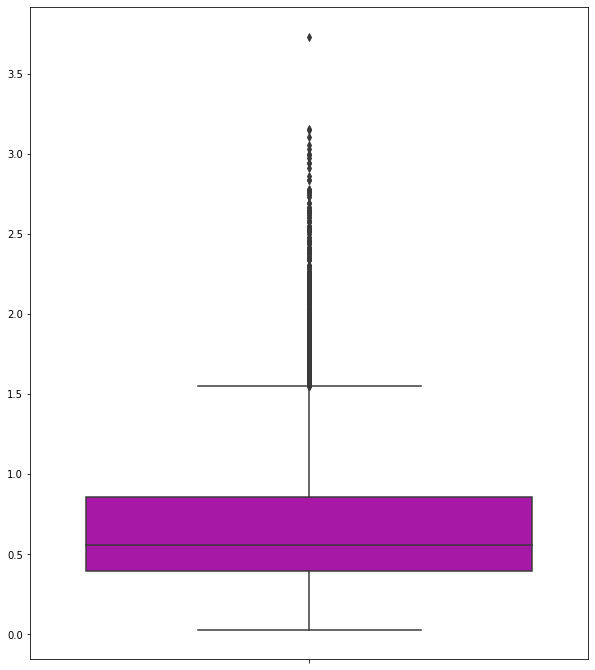

In [49]:
fig, ax = plt.subplots(figsize=(10,12))
sns.boxplot(y=["Активная мощность"],
            palette=["m", "g"],
            data=data_arc)

In [50]:
data_arc.loc[:,["Активная мощность","Реактивная мощность"]].describe()

Активная мощность  Реактивная мощность
count       14876.000000         14876.000000
mean            0.670441             0.452592
std             0.408159             5.878702
min             0.030002          -715.504924
25%             0.395297             0.290991
50%             0.555517             0.415962
75%             0.857034             0.637371
max             3.731596             2.676388

In [51]:
data_arc.loc[data_arc["Реактивная мощность"]>=0,:].describe()

key  Активная мощность  Реактивная мощность  \
count  14875.000000       14875.000000         14875.000000   
mean    1615.186756           0.670453             0.500723   
std      934.593897           0.408170             0.310880   
min        1.000000           0.030002             0.020806   
25%      806.000000           0.395295             0.291003   
50%     1617.000000           0.555565             0.415984   
75%     2429.000000           0.857049             0.637403   
max     3241.000000           3.731596             2.676388   

       Процент активной мощности  
count               14875.000000  
mean                    0.573920  
std                     0.034126  
min                     0.314119  
25%                     0.556959  
50%                     0.579141  
75%                     0.596870  
max                     0.660998

Проблема была в одном значении, и она решена.

In [52]:
data_arc = data_arc.loc[data_arc["Реактивная мощность"]>=0,:]

Внесем данные о полной мощности в таблицу. 
Согласно https://ru.wikipedia.org/wiki/Электрическая_мощность полная мощность 

$$
S=\sqrt{P^2 + Q^2}
$$

$P$ — активная мощность,   
$Q$ — реактивная мощность (при индуктивной нагрузке $Q>0$, а при ёмкостной $Q<0$.

In [53]:
import math
def av_geom(row):
    act = row["Активная мощность"]
    passive = row["Реактивная мощность"]
    return math.sqrt(act**2 + passive**2)

In [54]:
data_arc["Полная мощность"] = data_arc.apply(av_geom, axis = 1)
data_arc = data_arc.drop(columns = ['Процент активной мощности'])
data_arc

key Начало нагрева дугой Конец нагрева дугой  Активная мощность  \
0         1  2019-05-03 11:02:14 2019-05-03 11:06:02           0.976059   
1         1  2019-05-03 11:07:28 2019-05-03 11:10:33           0.805607   
2         1  2019-05-03 11:11:44 2019-05-03 11:14:36           0.744363   
3         1  2019-05-03 11:18:14 2019-05-03 11:24:19           1.659363   
4         1  2019-05-03 11:26:09 2019-05-03 11:28:37           0.692755   
...     ...                  ...                 ...                ...   
14871  3241  2019-09-01 03:58:58 2019-09-01 04:01:35           0.533670   
14872  3241  2019-09-01 04:05:04 2019-09-01 04:08:04           0.676604   
14873  3241  2019-09-01 04:16:41 2019-09-01 04:19:45           0.733899   
14874  3241  2019-09-01 04:31:51 2019-09-01 04:32:48           0.220694   
14875  3241  2019-09-01 04:34:47 2019-09-01 04:36:08           0.306580   

       Реактивная мощность  Полная мощность  
0                 0.687084         1.193639  
1                 0.520285         0.959010  
2                 0.498805         0.896038  
3                 1.062669         1.970470  
4                 0.414397         0.807239  
...                    ...              ...  
14871             0.354439         0.640648  
14872             0.523631         0.855559  
14873             0.475654         0.874560  
14874             0.145768         0.264489  
14875             0.196708         0.364260  

[14875 rows x 6 columns]

Полную мощность мы нашли. Перейдем теперь к совершенной работе. Нам понадобится сперва промежуток времени во включенном состоянии.

In [55]:
data_arc['Интервал'] = (data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).apply(lambda x: x.total_seconds())
data_arc

key Начало нагрева дугой Конец нагрева дугой  Активная мощность  \
0         1  2019-05-03 11:02:14 2019-05-03 11:06:02           0.976059   
1         1  2019-05-03 11:07:28 2019-05-03 11:10:33           0.805607   
2         1  2019-05-03 11:11:44 2019-05-03 11:14:36           0.744363   
3         1  2019-05-03 11:18:14 2019-05-03 11:24:19           1.659363   
4         1  2019-05-03 11:26:09 2019-05-03 11:28:37           0.692755   
...     ...                  ...                 ...                ...   
14871  3241  2019-09-01 03:58:58 2019-09-01 04:01:35           0.533670   
14872  3241  2019-09-01 04:05:04 2019-09-01 04:08:04           0.676604   
14873  3241  2019-09-01 04:16:41 2019-09-01 04:19:45           0.733899   
14874  3241  2019-09-01 04:31:51 2019-09-01 04:32:48           0.220694   
14875  3241  2019-09-01 04:34:47 2019-09-01 04:36:08           0.306580   

       Реактивная мощность  Полная мощность  Интервал  
0                 0.687084         1.193639     228.0  
1                 0.520285         0.959010     185.0  
2                 0.498805         0.896038     172.0  
3                 1.062669         1.970470     365.0  
4                 0.414397         0.807239     148.0  
...                    ...              ...       ...  
14871             0.354439         0.640648     157.0  
14872             0.523631         0.855559     180.0  
14873             0.475654         0.874560     184.0  
14874             0.145768         0.264489      57.0  
14875             0.196708         0.364260      81.0  

[14875 rows x 7 columns]

In [56]:
data_arc['Активная работа'] = data_arc['Активная мощность']*data_arc['Интервал']
data_arc['Реактивная работа'] = data_arc['Реактивная мощность']*data_arc['Интервал']
data_arc['Полная работа'] = data_arc['Полная мощность']*data_arc['Интервал']
data_arc

key Начало нагрева дугой Конец нагрева дугой  Активная мощность  \
0         1  2019-05-03 11:02:14 2019-05-03 11:06:02           0.976059   
1         1  2019-05-03 11:07:28 2019-05-03 11:10:33           0.805607   
2         1  2019-05-03 11:11:44 2019-05-03 11:14:36           0.744363   
3         1  2019-05-03 11:18:14 2019-05-03 11:24:19           1.659363   
4         1  2019-05-03 11:26:09 2019-05-03 11:28:37           0.692755   
...     ...                  ...                 ...                ...   
14871  3241  2019-09-01 03:58:58 2019-09-01 04:01:35           0.533670   
14872  3241  2019-09-01 04:05:04 2019-09-01 04:08:04           0.676604   
14873  3241  2019-09-01 04:16:41 2019-09-01 04:19:45           0.733899   
14874  3241  2019-09-01 04:31:51 2019-09-01 04:32:48           0.220694   
14875  3241  2019-09-01 04:34:47 2019-09-01 04:36:08           0.306580   

       Реактивная мощность  Полная мощность  Интервал  Активная работа  \
0                 0.687084         1.193639     228.0       222.541395   
1                 0.520285         0.959010     185.0       149.037310   
2                 0.498805         0.896038     172.0       128.030509   
3                 1.062669         1.970470     365.0       605.667332   
4                 0.414397         0.807239     148.0       102.527702   
...                    ...              ...       ...              ...   
14871             0.354439         0.640648     157.0        83.786125   
14872             0.523631         0.855559     180.0       121.788672   
14873             0.475654         0.874560     184.0       135.037503   
14874             0.145768         0.264489      57.0        12.579555   
14875             0.196708         0.364260      81.0        24.832985   

       Реактивная работа  Полная работа  
0             156.655088     272.149755  
1              96.252771     177.416785  
2              85.794529     154.118502  
3             387.874330     719.221394  
4              61.330791     119.471318  
...                  ...            ...  
14871          55.646875     100.581755  
14872          94.253538     154.000682  
14873          87.520271     160.919002  
14874           8.308799      15.075853  
14875          15.933326      29.505051  

[14875 rows x 10 columns]

Нам остается сгруппировать строки по ключу, извлекая попутно суммы работ, самое раннее начало нагрева и самое позднее окончание нагрева.

In [57]:
data_arc_pivot = data_arc.pivot_table(values=['Начало нагрева дугой','Конец нагрева дугой','Активная работа','Реактивная работа','Полная работа'],
                                 index  = 'key',
                                 aggfunc = {'Начало нагрева дугой': 'min',
                                           'Конец нагрева дугой':'max',
                                           'Активная работа':'sum',
                                            'Реактивная работа':'sum',
                                            'Полная работа':'sum'})[['Начало нагрева дугой','Конец нагрева дугой','Активная работа','Реактивная работа','Полная работа']]
data_arc_pivot

Начало нагрева дугой Конец нагрева дугой  Активная работа  \
key                                                              
1     2019-05-03 11:02:14 2019-05-03 11:28:37      1207.804249   
2     2019-05-03 11:34:14 2019-05-03 11:53:18       733.816470   
3     2019-05-03 12:06:54 2019-05-03 12:32:19       443.583327   
4     2019-05-03 12:39:37 2019-05-03 12:57:50       670.663327   
5     2019-05-03 13:11:13 2019-05-03 13:33:55       997.496095   
...                   ...                 ...              ...   
3237  2019-08-31 22:41:18 2019-08-31 23:03:48       777.993447   
3238  2019-08-31 23:26:18 2019-08-31 23:41:28       432.849310   
3239  2019-09-01 01:26:53 2019-09-01 02:15:43       844.977151   
3240  2019-09-01 02:35:24 2019-09-01 03:34:08       554.283211   
3241  2019-09-01 03:58:58 2019-09-01 04:36:08       378.024840   

      Реактивная работа  Полная работа  
key                                     
1            787.907510    1442.377754  
2            487.590677     881.233565  
3            280.936835     525.066777  
4            429.935932     796.911309  
5            664.940090    1199.137958  
...                 ...            ...  
3237         559.334413     958.336236  
3238         348.343323     555.867370  
3239         557.964769    1013.067719  
3240         471.603883     729.208940  
3241         261.662809     460.082343  

[3214 rows x 5 columns]

## Внесение температурных данных в датафрейм

In [58]:
# data_final.merge(data_temp, left_index = True, right_on = 'key')
data_temp.head(20)

key        Время замера  Температура
0     1 2019-05-03 11:16:18       1571.0
1     1 2019-05-03 11:25:53       1604.0
2     1 2019-05-03 11:29:11       1618.0
3     1 2019-05-03 11:30:01       1601.0
4     1 2019-05-03 11:30:39       1613.0
5     2 2019-05-03 11:37:27       1581.0
6     2 2019-05-03 11:38:00       1577.0
7     2 2019-05-03 11:49:38       1589.0
8     2 2019-05-03 11:55:50       1604.0
9     2 2019-05-03 11:58:24       1608.0
10    2 2019-05-03 11:59:12       1602.0
11    3 2019-05-03 12:13:17       1596.0
12    3 2019-05-03 12:18:36       1597.0
13    3 2019-05-03 12:25:06       1598.0
14    3 2019-05-03 12:30:48       1599.0
15    3 2019-05-03 12:34:57       1599.0
16    4 2019-05-03 12:52:57       1601.0
17    4 2019-05-03 12:58:43       1623.0
18    4 2019-05-03 12:59:25       1625.0
19    5 2019-05-03 13:23:19       1576.0

In [59]:
data_temp.tail(20)

key        Время замера  Температура
15887  3239 2019-09-01 01:42:46          NaN
15888  3239 2019-09-01 01:48:00          NaN
15889  3239 2019-09-01 01:59:27          NaN
15890  3239 2019-09-01 02:13:30          NaN
15891  3239 2019-09-01 02:22:15          NaN
15892  3239 2019-09-01 02:23:02          NaN
15893  3239 2019-09-01 02:24:15          NaN
15894  3240 2019-09-01 02:39:01       1617.0
15895  3240 2019-09-01 02:48:33          NaN
15896  3240 2019-09-01 03:03:21          NaN
15897  3240 2019-09-01 03:12:19          NaN
15898  3240 2019-09-01 03:19:09          NaN
15899  3240 2019-09-01 03:31:27          NaN
15900  3240 2019-09-01 03:34:31          NaN
15901  3240 2019-09-01 03:35:16          NaN
15902  3241 2019-09-01 04:03:30       1586.0
15903  3241 2019-09-01 04:16:12          NaN
15904  3241 2019-09-01 04:22:39          NaN
15905  3241 2019-09-01 04:33:42          NaN
15906  3241 2019-09-01 04:38:08          NaN

Видим, что на часть плавок у нас только одно значение температуры. Это необходимо исправить, исключив такие ключи

In [60]:
data_temp.groupby('key').count()

Время замера  Температура
key                            
1                5            5
2                6            6
3                5            5
4                3            3
5                2            2
...            ...          ...
3237             5            1
3238             3            1
3239             8            1
3240             8            1
3241             5            1

[3216 rows x 2 columns]

In [61]:
mask = data_temp.groupby('key').count().Температура > 1
mask

key
1        True
2        True
3        True
4        True
5        True
        ...  
3237    False
3238    False
3239    False
3240    False
3241    False
Name: Температура, Length: 3216, dtype: bool

In [62]:
data_temp_pivot = data_temp.sort_values('Время замера', ascending = True).pivot_table(index  = 'key', aggfunc = ['first','last'])
data_temp_pivot.columns = ['_'.join(col) for col in data_temp_pivot.columns.values]
data_temp_pivot = data_temp_pivot[mask]
data_temp_pivot

first_Время замера  first_Температура   last_Время замера  \
key                                                               
1    2019-05-03 11:16:18             1571.0 2019-05-03 11:30:39   
2    2019-05-03 11:37:27             1581.0 2019-05-03 11:59:12   
3    2019-05-03 12:13:17             1596.0 2019-05-03 12:34:57   
4    2019-05-03 12:52:57             1601.0 2019-05-03 12:59:25   
5    2019-05-03 13:23:19             1576.0 2019-05-03 13:36:01   
...                  ...                ...                 ...   
2495 2019-08-06 00:35:45             1570.0 2019-08-06 00:54:42   
2496 2019-08-06 01:02:54             1554.0 2019-08-06 01:29:52   
2497 2019-08-06 01:41:53             1571.0 2019-08-06 01:53:50   
2498 2019-08-06 02:03:49             1591.0 2019-08-06 02:25:31   
2499 2019-08-06 02:40:25             1569.0 2019-08-06 03:00:28   

      last_Температура  
key                     
1               1613.0  
2               1602.0  
3               1599.0  
4               1625.0  
5               1602.0  
...                ...  
2495            1591.0  
2496            1591.0  
2497            1589.0  
2498            1594.0  
2499            1603.0  

[2475 rows x 4 columns]

Данные по температуре и времени замера сгруппированы. 

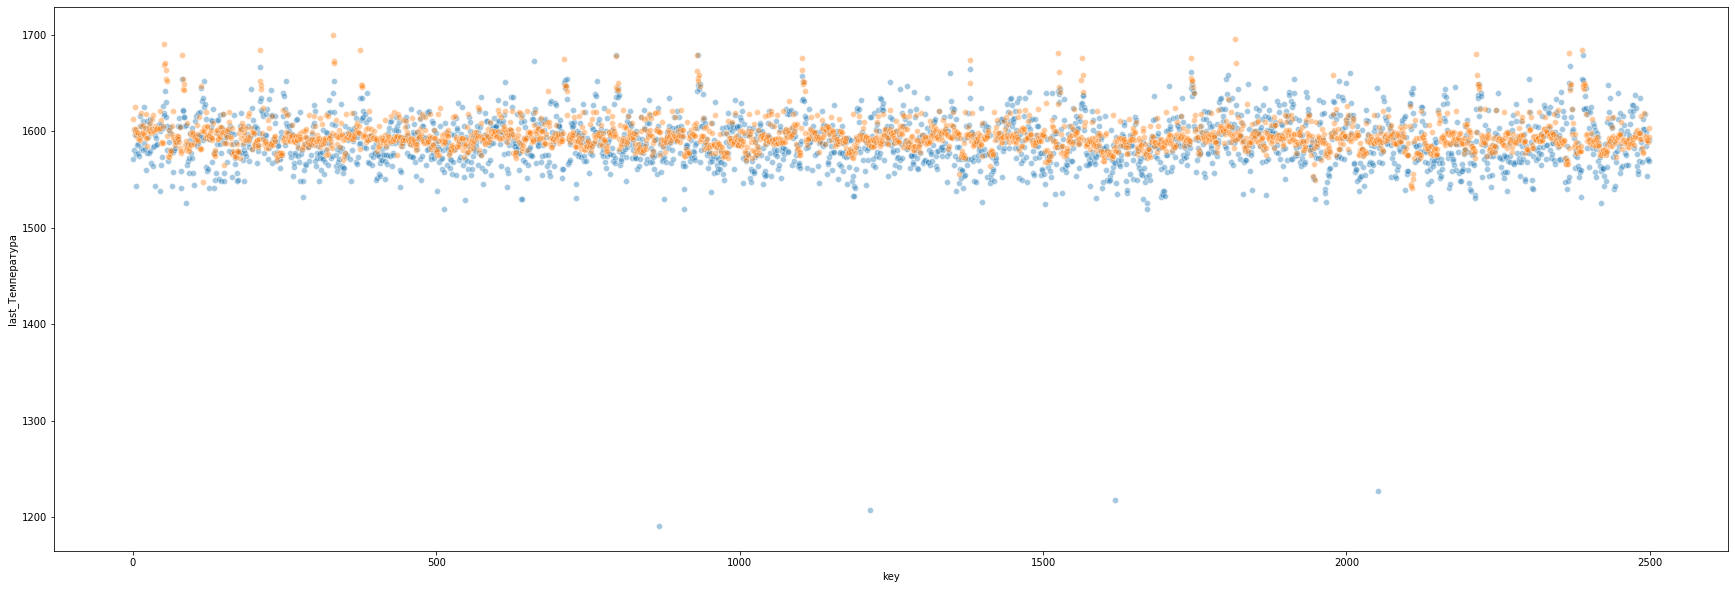

In [63]:
fig, ax = plt.subplots(figsize=(30,10))
sns.scatterplot(x = 'key', y = 'first_Температура', data = data_temp_pivot.reset_index(),alpha =0.4)
sns.scatterplot(x = 'key', y = 'last_Температура', data = data_temp_pivot.reset_index(),alpha =0.4)

In [64]:
data_temp_pivot.loc[(data_temp_pivot['first_Температура']<1300) | (data_temp_pivot['last_Температура']<1300),:]

first_Время замера  first_Температура   last_Время замера  \
key                                                               
867  2019-06-04 14:21:00             1191.0 2019-06-04 14:57:17   
1214 2019-06-16 05:32:00             1208.0 2019-06-16 06:14:45   
1619 2019-06-30 11:03:54             1218.0 2019-06-30 11:21:54   
2052 2019-07-21 14:51:40             1227.0 2019-07-21 15:24:06   

      last_Температура  
key                     
867             1599.0  
1214            1591.0  
1619            1590.0  
2052            1592.0

Мы наблюдаем, что некоторое количество значений температуры менее 1300 градусов. Не могу сказать, является ли это аномалией, т.к. температура изначальная а не при разливе. <font color='purple'> Удалим данные значения. [Температура](#https://www.google.com/search?client=opera&q=температура+плавления+стали&sourceid=opera&ie=UTF-8&oe=UTF-8) плавления лежит в диапазоне 1300-1500 градусов.</font>

In [65]:
data_temp_pivot = data_temp_pivot.loc[(data_temp_pivot['first_Температура']>1300) & (data_temp_pivot['last_Температура']>1300),:]
data_temp_pivot

first_Время замера  first_Температура   last_Время замера  \
key                                                               
1    2019-05-03 11:16:18             1571.0 2019-05-03 11:30:39   
2    2019-05-03 11:37:27             1581.0 2019-05-03 11:59:12   
3    2019-05-03 12:13:17             1596.0 2019-05-03 12:34:57   
4    2019-05-03 12:52:57             1601.0 2019-05-03 12:59:25   
5    2019-05-03 13:23:19             1576.0 2019-05-03 13:36:01   
...                  ...                ...                 ...   
2495 2019-08-06 00:35:45             1570.0 2019-08-06 00:54:42   
2496 2019-08-06 01:02:54             1554.0 2019-08-06 01:29:52   
2497 2019-08-06 01:41:53             1571.0 2019-08-06 01:53:50   
2498 2019-08-06 02:03:49             1591.0 2019-08-06 02:25:31   
2499 2019-08-06 02:40:25             1569.0 2019-08-06 03:00:28   

      last_Температура  
key                     
1               1613.0  
2               1602.0  
3               1599.0  
4               1625.0  
5               1602.0  
...                ...  
2495            1591.0  
2496            1591.0  
2497            1589.0  
2498            1594.0  
2499            1603.0  

[2471 rows x 4 columns]

In [66]:
data_final = data_temp_pivot.merge(data_arc_pivot ,how='left', right_index = True, left_index = True)
data_final

first_Время замера  first_Температура   last_Время замера  \
key                                                               
1    2019-05-03 11:16:18             1571.0 2019-05-03 11:30:39   
2    2019-05-03 11:37:27             1581.0 2019-05-03 11:59:12   
3    2019-05-03 12:13:17             1596.0 2019-05-03 12:34:57   
4    2019-05-03 12:52:57             1601.0 2019-05-03 12:59:25   
5    2019-05-03 13:23:19             1576.0 2019-05-03 13:36:01   
...                  ...                ...                 ...   
2495 2019-08-06 00:35:45             1570.0 2019-08-06 00:54:42   
2496 2019-08-06 01:02:54             1554.0 2019-08-06 01:29:52   
2497 2019-08-06 01:41:53             1571.0 2019-08-06 01:53:50   
2498 2019-08-06 02:03:49             1591.0 2019-08-06 02:25:31   
2499 2019-08-06 02:40:25             1569.0 2019-08-06 03:00:28   

      last_Температура Начало нагрева дугой Конец нагрева дугой  \
key                                                               
1               1613.0  2019-05-03 11:02:14 2019-05-03 11:28:37   
2               1602.0  2019-05-03 11:34:14 2019-05-03 11:53:18   
3               1599.0  2019-05-03 12:06:54 2019-05-03 12:32:19   
4               1625.0  2019-05-03 12:39:37 2019-05-03 12:57:50   
5               1602.0  2019-05-03 13:11:13 2019-05-03 13:33:55   
...                ...                  ...                 ...   
2495            1591.0  2019-08-06 00:31:05 2019-08-06 00:51:13   
2496            1591.0  2019-08-06 01:00:06 2019-08-06 01:23:32   
2497            1589.0  2019-08-06 01:38:01 2019-08-06 01:50:45   
2498            1594.0  2019-08-06 01:57:46 2019-08-06 02:20:24   
2499            1603.0  2019-08-06 02:32:56 2019-08-06 02:55:42   

      Активная работа  Реактивная работа  Полная работа  
key                                                      
1         1207.804249         787.907510    1442.377754  
2          733.816470         487.590677     881.233565  
3          443.583327         280.936835     525.066777  
4          670.663327         429.935932     796.911309  
5          997.496095         664.940090    1199.137958  
...               ...                ...            ...  
2495       626.167357         462.572488     778.818234  
2496       727.868032         485.842067     875.261419  
2497       427.535518         356.837023     556.930349  
2498       629.928649         438.905595     767.817794  
2499      1075.132183         733.110945    1301.828445  

[2471 rows x 9 columns]

## Внесение информации о добавках 

У нас остались неохваченными данные о вносимых добавках (сыпучих, проволоках, продувке инертным газом). Именно сейчас мы их внесем. 

In [67]:
data_gas_pivot = data_gas.set_index('key')
data_gas_pivot

Газ 1
key            
1     29.749986
2     12.555561
3     28.554793
4     18.841219
5      5.413692
...         ...
3237   5.543905
3238   6.745669
3239  16.023518
3240  11.863103
3241  12.680959

[3239 rows x 1 columns]

In [68]:
data_final = data_final.merge(data_gas_pivot, how= 'left', right_index = True, left_index=True)

Информация о газе внесена. Теперь проволоки и сыпучие материалы.

In [69]:
data_final = data_final.merge(data_bulk.set_index('key'), how= 'left', right_index = True, left_index=True)
data_final = data_final.merge(data_bulk_time.set_index('key'), how= 'left', right_index = True, left_index=True)
data_final = data_final.merge(data_wire.set_index('key'), how= 'left', right_index = True, left_index=True)
data_final = data_final.merge(data_wire_time.set_index('key'), how= 'left', right_index = True, left_index=True)
data_final.columns

Index(['first_Время замера', 'first_Температура', 'last_Время замера',
       'last_Температура', 'Начало нагрева дугой', 'Конец нагрева дугой',
       'Активная работа', 'Реактивная работа', 'Полная работа', 'Газ 1',
       'Bulk 1_x', 'Bulk 2_x', 'Bulk 3_x', 'Bulk 4_x', 'Bulk 5_x', 'Bulk 6_x',
       'Bulk 7_x', 'Bulk 8_x', 'Bulk 9_x', 'Bulk 10_x', 'Bulk 11_x',
       'Bulk 12_x', 'Bulk 13_x', 'Bulk 14_x', 'Bulk 15_x', 'Bulk 1_y',
       'Bulk 2_y', 'Bulk 3_y', 'Bulk 4_y', 'Bulk 5_y', 'Bulk 6_y', 'Bulk 7_y',
       'Bulk 8_y', 'Bulk 9_y', 'Bulk 10_y', 'Bulk 11_y', 'Bulk 12_y',
       'Bulk 13_y', 'Bulk 14_y', 'Bulk 15_y', 'Wire 1_x', 'Wire 2_x',
       'Wire 3_x', 'Wire 4_x', 'Wire 5_x', 'Wire 6_x', 'Wire 7_x', 'Wire 8_x',
       'Wire 9_x', 'Wire 1_y', 'Wire 2_y', 'Wire 3_y', 'Wire 4_y', 'Wire 5_y',
       'Wire 6_y', 'Wire 7_y', 'Wire 8_y', 'Wire 9_y'],
      dtype='object')

In [70]:
data_final.columns = [col.replace("_x","").replace("_y","_time") for col in data_final.columns.values]
data_final

first_Время замера  first_Температура   last_Время замера  \
key                                                               
1    2019-05-03 11:16:18             1571.0 2019-05-03 11:30:39   
2    2019-05-03 11:37:27             1581.0 2019-05-03 11:59:12   
3    2019-05-03 12:13:17             1596.0 2019-05-03 12:34:57   
4    2019-05-03 12:52:57             1601.0 2019-05-03 12:59:25   
5    2019-05-03 13:23:19             1576.0 2019-05-03 13:36:01   
...                  ...                ...                 ...   
2495 2019-08-06 00:35:45             1570.0 2019-08-06 00:54:42   
2496 2019-08-06 01:02:54             1554.0 2019-08-06 01:29:52   
2497 2019-08-06 01:41:53             1571.0 2019-08-06 01:53:50   
2498 2019-08-06 02:03:49             1591.0 2019-08-06 02:25:31   
2499 2019-08-06 02:40:25             1569.0 2019-08-06 03:00:28   

      last_Температура Начало нагрева дугой Конец нагрева дугой  \
key                                                               
1               1613.0  2019-05-03 11:02:14 2019-05-03 11:28:37   
2               1602.0  2019-05-03 11:34:14 2019-05-03 11:53:18   
3               1599.0  2019-05-03 12:06:54 2019-05-03 12:32:19   
4               1625.0  2019-05-03 12:39:37 2019-05-03 12:57:50   
5               1602.0  2019-05-03 13:11:13 2019-05-03 13:33:55   
...                ...                  ...                 ...   
2495            1591.0  2019-08-06 00:31:05 2019-08-06 00:51:13   
2496            1591.0  2019-08-06 01:00:06 2019-08-06 01:23:32   
2497            1589.0  2019-08-06 01:38:01 2019-08-06 01:50:45   
2498            1594.0  2019-08-06 01:57:46 2019-08-06 02:20:24   
2499            1603.0  2019-08-06 02:32:56 2019-08-06 02:55:42   

      Активная работа  Реактивная работа  Полная работа      Газ 1  ...  \
key                                                                 ...   
1         1207.804249         787.907510    1442.377754  29.749986  ...   
2          733.816470         487.590677     881.233565  12.555561  ...   
3          443.583327         280.936835     525.066777  28.554793  ...   
4          670.663327         429.935932     796.911309  18.841219  ...   
5          997.496095         664.940090    1199.137958   5.413692  ...   
...               ...                ...            ...        ...  ...   
2495       626.167357         462.572488     778.818234   7.125735  ...   
2496       727.868032         485.842067     875.261419   9.412616  ...   
2497       427.535518         356.837023     556.930349   6.271699  ...   
2498       629.928649         438.905595     767.817794  14.953657  ...   
2499      1075.132183         733.110945    1301.828445  11.336151  ...   

      Wire 9         Wire 1_time         Wire 2_time  Wire 3_time  \
key                                                                 
1        NaN 2019-05-03 11:11:41                 NaT          NaT   
2        NaN 2019-05-03 11:46:10                 NaT          NaT   
3        NaN 2019-05-03 12:13:47                 NaT          NaT   
4        NaN 2019-05-03 12:48:05                 NaT          NaT   
5        NaN 2019-05-03 13:18:15 2019-05-03 13:32:06          NaT   
...      ...                 ...                 ...          ...   
2495     NaN 2019-08-06 00:36:13                 NaT          NaT   
2496     NaN 2019-08-06 01:13:33                 NaT          NaT   
2497     NaN 2019-08-06 01:42:27 2019-08-06 01:42:51          NaT   
2498     NaN 2019-08-06 02:04:20                 NaT          NaT   
2499     NaN 2019-08-06 02:39:57 2019-08-06 02:41:06          NaT   

      Wire 4_time  Wire 5_time  Wire 6_time  Wire 7_time  Wire 8_time  \
key                                                                     
1             NaT          NaT          NaT          NaT          NaT   
2             NaT          NaT          NaT          NaT          NaT   
3             NaT          NaT          NaT          NaT          NaT   
4             NaT      

In [71]:
data_final.columns

Index(['first_Время замера', 'first_Температура', 'last_Время замера',
       'last_Температура', 'Начало нагрева дугой', 'Конец нагрева дугой',
       'Активная работа', 'Реактивная работа', 'Полная работа', 'Газ 1',
       'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7',
       'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13',
       'Bulk 14', 'Bulk 15', 'Bulk 1_time', 'Bulk 2_time', 'Bulk 3_time',
       'Bulk 4_time', 'Bulk 5_time', 'Bulk 6_time', 'Bulk 7_time',
       'Bulk 8_time', 'Bulk 9_time', 'Bulk 10_time', 'Bulk 11_time',
       'Bulk 12_time', 'Bulk 13_time', 'Bulk 14_time', 'Bulk 15_time',
       'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7',
       'Wire 8', 'Wire 9', 'Wire 1_time', 'Wire 2_time', 'Wire 3_time',
       'Wire 4_time', 'Wire 5_time', 'Wire 6_time', 'Wire 7_time',
       'Wire 8_time', 'Wire 9_time'],
      dtype='object')

In [72]:
for i in range(1,10):
    col_name = 'Wire ' + str(i) + '_time'
    col_name_new = 'Wire ' + str(i) + '_timedelta'
    data_final[col_name_new] = (data_final[col_name] - data_final['first_Время замера']).apply(lambda x: x.total_seconds())
    print(col_name_new)

for i in range(1,16):
    col_name = 'Bulk ' + str(i) + '_time'
    col_name_new = 'Bulk ' + str(i) + '_timedelta'
    data_final[col_name_new] = (data_final[col_name] - data_final['first_Время замера']).apply(lambda x: x.total_seconds())
    print(col_name_new)
    
data_final

Wire 1_timedelta
Wire 2_timedelta
Wire 3_timedelta
Wire 4_timedelta
Wire 5_timedelta
Wire 6_timedelta
Wire 7_timedelta
Wire 8_timedelta
Wire 9_timedelta
Bulk 1_timedelta
Bulk 2_timedelta
Bulk 3_timedelta
Bulk 4_timedelta
Bulk 5_timedelta
Bulk 6_timedelta
Bulk 7_timedelta
Bulk 8_timedelta
Bulk 9_timedelta
Bulk 10_timedelta
Bulk 11_timedelta
Bulk 12_timedelta
Bulk 13_timedelta
Bulk 14_timedelta
Bulk 15_timedelta


first_Время замера  first_Температура   last_Время замера  \
key                                                               
1    2019-05-03 11:16:18             1571.0 2019-05-03 11:30:39   
2    2019-05-03 11:37:27             1581.0 2019-05-03 11:59:12   
3    2019-05-03 12:13:17             1596.0 2019-05-03 12:34:57   
4    2019-05-03 12:52:57             1601.0 2019-05-03 12:59:25   
5    2019-05-03 13:23:19             1576.0 2019-05-03 13:36:01   
...                  ...                ...                 ...   
2495 2019-08-06 00:35:45             1570.0 2019-08-06 00:54:42   
2496 2019-08-06 01:02:54             1554.0 2019-08-06 01:29:52   
2497 2019-08-06 01:41:53             1571.0 2019-08-06 01:53:50   
2498 2019-08-06 02:03:49             1591.0 2019-08-06 02:25:31   
2499 2019-08-06 02:40:25             1569.0 2019-08-06 03:00:28   

      last_Температура Начало нагрева дугой Конец нагрева дугой  \
key                                                               
1               1613.0  2019-05-03 11:02:14 2019-05-03 11:28:37   
2               1602.0  2019-05-03 11:34:14 2019-05-03 11:53:18   
3               1599.0  2019-05-03 12:06:54 2019-05-03 12:32:19   
4               1625.0  2019-05-03 12:39:37 2019-05-03 12:57:50   
5               1602.0  2019-05-03 13:11:13 2019-05-03 13:33:55   
...                ...                  ...                 ...   
2495            1591.0  2019-08-06 00:31:05 2019-08-06 00:51:13   
2496            1591.0  2019-08-06 01:00:06 2019-08-06 01:23:32   
2497            1589.0  2019-08-06 01:38:01 2019-08-06 01:50:45   
2498            1594.0  2019-08-06 01:57:46 2019-08-06 02:20:24   
2499            1603.0  2019-08-06 02:32:56 2019-08-06 02:55:42   

      Активная работа  Реактивная работа  Полная работа      Газ 1  ...  \
key                                                                 ...   
1         1207.804249         787.907510    1442.377754  29.749986  ...   
2          733.816470         487.590677     881.233565  12.555561  ...   
3          443.583327         280.936835     525.066777  28.554793  ...   
4          670.663327         429.935932     796.911309  18.841219  ...   
5          997.496095         664.940090    1199.137958   5.413692  ...   
...               ...                ...            ...        ...  ...   
2495       626.167357         462.572488     778.818234   7.125735  ...   
2496       727.868032         485.842067     875.261419   9.412616  ...   
2497       427.535518         356.837023     556.930349   6.271699  ...   
2498       629.928649         438.905595     767.817794  14.953657  ...   
2499      1075.132183         733.110945    1301.828445  11.336151  ...   

      Bulk 6_timedelta  Bulk 7_timedelta  Bulk 8_timedelta  Bulk 9_timedelta  \
key                                                                            
1                  NaN               NaN               NaN               NaN   
2                  NaN               NaN               NaN               NaN   
3                  NaN               NaN               NaN               NaN   
4                  NaN               NaN               NaN               NaN   
5                  NaN               NaN               NaN               NaN   
...                ...               ...               ...               ...   
2495               NaN               NaN               NaN               NaN   
2496               NaN               NaN               NaN               NaN   
2497               NaN               NaN               NaN               NaN   
2498               NaN               NaN               NaN               NaN   
2499               NaN               NaN               NaN               NaN   

      Bulk 10_timedelta  Bulk 11_timedelta  Bulk 12_timedelta  \
key                                                             
1                   NaN                NaN             -746.0   
2                   NaN                NaN        

In [73]:
removing_columns = ['Bulk 1_time', 'Bulk 2_time', 'Bulk 3_time',
       'Bulk 4_time', 'Bulk 5_time', 'Bulk 6_time', 'Bulk 7_time',
       'Bulk 8_time', 'Bulk 9_time', 'Bulk 10_time', 'Bulk 11_time',
       'Bulk 12_time', 'Bulk 13_time', 'Bulk 14_time', 'Bulk 15_time',
       'Wire 1_time', 'Wire 2_time', 'Wire 3_time',
       'Wire 4_time', 'Wire 5_time', 'Wire 6_time', 'Wire 7_time',
       'Wire 8_time', 'Wire 9_time', 'Начало нагрева дугой','Конец нагрева дугой']

data_final = data_final.drop(columns = removing_columns)

In [74]:
len(data_final[data_final['Bulk 12_timedelta']<0 ])

368

Обратим внимание, что часть замеров температуры сделана ПОСЛЕ внесения первых добавок. Аналогичная ситуация и с окончательным замером - часть компонентов внесена уже после. Я не буду считать это ошибкой. В конце концов влияние данных компонентов можно исключить...
Наша основная задача гибко предсказывать влияние вносимых компонентов на температуру. 

Также отмечу, что нас не интересует время последнего замера, но интересует разница между замерами начальным и окончательным.

In [75]:
data_final['Разница времени замера'] = (data_final['last_Время замера'] - data_final['first_Время замера']).apply(lambda x: x.total_seconds())
data_final = data_final.drop(columns = 'last_Время замера')
data_final

first_Время замера  first_Температура  last_Температура  \
key                                                             
1    2019-05-03 11:16:18             1571.0            1613.0   
2    2019-05-03 11:37:27             1581.0            1602.0   
3    2019-05-03 12:13:17             1596.0            1599.0   
4    2019-05-03 12:52:57             1601.0            1625.0   
5    2019-05-03 13:23:19             1576.0            1602.0   
...                  ...                ...               ...   
2495 2019-08-06 00:35:45             1570.0            1591.0   
2496 2019-08-06 01:02:54             1554.0            1591.0   
2497 2019-08-06 01:41:53             1571.0            1589.0   
2498 2019-08-06 02:03:49             1591.0            1594.0   
2499 2019-08-06 02:40:25             1569.0            1603.0   

      Активная работа  Реактивная работа  Полная работа      Газ 1  Bulk 1  \
key                                                                          
1         1207.804249         787.907510    1442.377754  29.749986     NaN   
2          733.816470         487.590677     881.233565  12.555561     NaN   
3          443.583327         280.936835     525.066777  28.554793     NaN   
4          670.663327         429.935932     796.911309  18.841219     NaN   
5          997.496095         664.940090    1199.137958   5.413692     NaN   
...               ...                ...            ...        ...     ...   
2495       626.167357         462.572488     778.818234   7.125735     NaN   
2496       727.868032         485.842067     875.261419   9.412616     NaN   
2497       427.535518         356.837023     556.930349   6.271699     NaN   
2498       629.928649         438.905595     767.817794  14.953657     NaN   
2499      1075.132183         733.110945    1301.828445  11.336151     NaN   

      Bulk 2  Bulk 3  ...  Bulk 7_timedelta  Bulk 8_timedelta  \
key                   ...                                       
1        NaN     NaN  ...               NaN               NaN   
2        NaN     NaN  ...               NaN               NaN   
3        NaN     NaN  ...               NaN               NaN   
4        NaN     NaN  ...               NaN               NaN   
5        NaN     NaN  ...               NaN               NaN   
...      ...     ...  ...               ...               ...   
2495     NaN    21.0  ...               NaN               NaN   
2496     NaN     NaN  ...               NaN               NaN   
2497     NaN     NaN  ...               NaN               NaN   
2498     NaN    90.0  ...               NaN               NaN   
2499     NaN    47.0  ...               NaN               NaN   

      Bulk 9_timedelta  Bulk 10_timedelta  Bulk 11_timedelta  \
key                                                            
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
5                  NaN                NaN                NaN   
...                ...                ...                ...   
2495               NaN               62.0                NaN   
2496               NaN              682.0                NaN   
2497               NaN                NaN                NaN   
2498               NaN               97.0                NaN   
2499               NaN                NaN                NaN   

      Bulk 12_timedelta  Bulk 13_timedelta  Bulk 14_timedelta  \
key                                                             
1                -746.0                NaN             -746.0   
2                 173.0                NaN              173.0   
3                -217.0                NaN             -217.0   
4                -693.0                NaN             -693.0   
5                -623.0                NaN             -623.0   
...        

Финальный этап очистки данных: убрать из расчета те компоненты, которые лежат за пределами временного окна между начальным и конечным измерением температуры. Пройдемся опять итеративно по данным и проверим, где у нас время внесения добавок не попадает в окно между замерами. Далее "не попадает" будет трактоваться как "не влияет" на оценку температуры.

In [76]:
data_final['Bulk 12_timedelta'].where((data_final['Bulk 12_timedelta'] > 0)&(data_final['Bulk 12_timedelta'] < data_final['Разница времени замера']))

key
1         NaN
2       173.0
3         NaN
4         NaN
5         NaN
        ...  
2495      NaN
2496    223.0
2497      NaN
2498      NaN
2499      NaN
Name: Bulk 12_timedelta, Length: 2471, dtype: float64

In [77]:
data_cleaned = data_final.copy()
data_cleaned.columns

Index(['first_Время замера', 'first_Температура', 'last_Температура',
       'Активная работа', 'Реактивная работа', 'Полная работа', 'Газ 1',
       'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7',
       'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13',
       'Bulk 14', 'Bulk 15', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5',
       'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9', 'Wire 1_timedelta',
       'Wire 2_timedelta', 'Wire 3_timedelta', 'Wire 4_timedelta',
       'Wire 5_timedelta', 'Wire 6_timedelta', 'Wire 7_timedelta',
       'Wire 8_timedelta', 'Wire 9_timedelta', 'Bulk 1_timedelta',
       'Bulk 2_timedelta', 'Bulk 3_timedelta', 'Bulk 4_timedelta',
       'Bulk 5_timedelta', 'Bulk 6_timedelta', 'Bulk 7_timedelta',
       'Bulk 8_timedelta', 'Bulk 9_timedelta', 'Bulk 10_timedelta',
       'Bulk 11_timedelta', 'Bulk 12_timedelta', 'Bulk 13_timedelta',
       'Bulk 14_timedelta', 'Bulk 15_timedelta', 'Разница времени замера'],
      dtype='o

In [78]:
ref_time = 'Разница времени замера'
for i in range(1,10):    
    
    col_name = 'Wire ' + str(i)
    col_name_timedelta = 'Wire ' + str(i) + '_timedelta'
    data_cleaned[col_name].where((data_final[col_name_timedelta] > 0) & (data_final[col_name_timedelta] < data_cleaned[ref_time]),inplace =True)
    data_cleaned[col_name_timedelta].where((data_final[col_name_timedelta] > 0)&(data_final[col_name_timedelta] < data_cleaned[ref_time]),inplace =True)
    print(col_name)

for i in range(1,16):    
    
    col_name = 'Bulk ' + str(i)
    col_name_timedelta = 'Bulk ' + str(i) + '_timedelta'
    data_cleaned[col_name].where((data_final[col_name_timedelta] > 0)&(data_final[col_name_timedelta] < data_cleaned[ref_time]),inplace =True)
    data_cleaned[col_name_timedelta].where((data_final[col_name_timedelta] > 0)&(data_final[col_name_timedelta] < data_cleaned[ref_time]),inplace =True)
    print(col_name)

data_cleaned = data_cleaned.fillna(0)
data_cleaned

Wire 1
Wire 2
Wire 3
Wire 4
Wire 5
Wire 6
Wire 7
Wire 8
Wire 9
Bulk 1
Bulk 2
Bulk 3
Bulk 4
Bulk 5
Bulk 6
Bulk 7
Bulk 8
Bulk 9
Bulk 10
Bulk 11
Bulk 12
Bulk 13
Bulk 14
Bulk 15


first_Время замера  first_Температура  last_Температура  \
key                                                             
1    2019-05-03 11:16:18             1571.0            1613.0   
2    2019-05-03 11:37:27             1581.0            1602.0   
3    2019-05-03 12:13:17             1596.0            1599.0   
4    2019-05-03 12:52:57             1601.0            1625.0   
5    2019-05-03 13:23:19             1576.0            1602.0   
...                  ...                ...               ...   
2495 2019-08-06 00:35:45             1570.0            1591.0   
2496 2019-08-06 01:02:54             1554.0            1591.0   
2497 2019-08-06 01:41:53             1571.0            1589.0   
2498 2019-08-06 02:03:49             1591.0            1594.0   
2499 2019-08-06 02:40:25             1569.0            1603.0   

      Активная работа  Реактивная работа  Полная работа      Газ 1  Bulk 1  \
key                                                                          
1         1207.804249         787.907510    1442.377754  29.749986     0.0   
2          733.816470         487.590677     881.233565  12.555561     0.0   
3          443.583327         280.936835     525.066777  28.554793     0.0   
4          670.663327         429.935932     796.911309  18.841219     0.0   
5          997.496095         664.940090    1199.137958   5.413692     0.0   
...               ...                ...            ...        ...     ...   
2495       626.167357         462.572488     778.818234   7.125735     0.0   
2496       727.868032         485.842067     875.261419   9.412616     0.0   
2497       427.535518         356.837023     556.930349   6.271699     0.0   
2498       629.928649         438.905595     767.817794  14.953657     0.0   
2499      1075.132183         733.110945    1301.828445  11.336151     0.0   

      Bulk 2  Bulk 3  ...  Bulk 7_timedelta  Bulk 8_timedelta  \
key                   ...                                       
1        0.0     0.0  ...               0.0               0.0   
2        0.0     0.0  ...               0.0               0.0   
3        0.0     0.0  ...               0.0               0.0   
4        0.0     0.0  ...               0.0               0.0   
5        0.0     0.0  ...               0.0               0.0   
...      ...     ...  ...               ...               ...   
2495     0.0    21.0  ...               0.0               0.0   
2496     0.0     0.0  ...               0.0               0.0   
2497     0.0     0.0  ...               0.0               0.0   
2498     0.0    90.0  ...               0.0               0.0   
2499     0.0    47.0  ...               0.0               0.0   

      Bulk 9_timedelta  Bulk 10_timedelta  Bulk 11_timedelta  \
key                                                            
1                  0.0                0.0                0.0   
2                  0.0                0.0                0.0   
3                  0.0                0.0                0.0   
4                  0.0                0.0                0.0   
5                  0.0                0.0                0.0   
...                ...                ...                ...   
2495               0.0               62.0                0.0   
2496               0.0              682.0                0.0   
2497               0.0                0.0                0.0   
2498               0.0               97.0                0.0   
2499               0.0                0.0                0.0   

      Bulk 12_timedelta  Bulk 13_timedelta  Bulk 14_timedelta  \
key                                                             
1                   0.0                0.0                0.0   
2                 173.0                0.0              173.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
5                   0.0                0.0                0.0   
...        

In [79]:
data_cleaned[['Bulk 10_timedelta','Bulk 10','Разница времени замера']]

Bulk 10_timedelta  Bulk 10  Разница времени замера
key                                                     
1                   0.0      0.0                   861.0
2                   0.0      0.0                  1305.0
3                   0.0      0.0                  1300.0
4                   0.0      0.0                   388.0
5                   0.0      0.0                   762.0
...                 ...      ...                     ...
2495               62.0     90.0                  1137.0
2496              682.0    122.0                  1618.0
2497                0.0      0.0                   717.0
2498               97.0    101.0                  1302.0
2499                0.0      0.0                  1203.0

[2471 rows x 3 columns]

In [80]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 1 to 2499
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   first_Время замера      2471 non-null   datetime64[ns]
 1   first_Температура       2471 non-null   float64       
 2   last_Температура        2471 non-null   float64       
 3   Активная работа         2471 non-null   float64       
 4   Реактивная работа       2471 non-null   float64       
 5   Полная работа           2471 non-null   float64       
 6   Газ 1                   2471 non-null   float64       
 7   Bulk 1                  2471 non-null   float64       
 8   Bulk 2                  2471 non-null   float64       
 9   Bulk 3                  2471 non-null   float64       
 10  Bulk 4                  2471 non-null   float64       
 11  Bulk 5                  2471 non-null   float64       
 12  Bulk 6                  2471 non-null   float64 

Проблем с данными не наблюдается. У нас есть 2475 плавок, и по ним будет производиться обучение моделей и их тестирование. 

# 6. [Подготовка модели](#Content) <a id='Model_training'></a>

Мы будем прогнозировать температуру стали на момент разлива ее в слэбы. Как мы увидели в EDA - это основной признак, который подвержен наиболее строгому контролю и стандартное отклонение по нему минимально. Высокая температура техпроцесса также является самой важной причиной необходимости нагрева стали.

## Подготовка признаков

Сперва разобьем выборку на обучающую и тестовую.

In [81]:
from sklearn.model_selection import train_test_split

Для начала обучим модель на признаках "без времени". То есть первоначальный датасет очистим от временных факторов: 
- Времени замеров и времени интервалов повторных замеров
- времени(интревалов) внесения сырья

Если заданные требуемые метрики по точности предсказания температуры достигнуты не будут, то в модель данные признаки будут добавлены.

In [82]:
columns = ['first_Время замера','Wire 1_timedelta',
       'Wire 2_timedelta', 'Wire 3_timedelta', 'Wire 4_timedelta',
       'Wire 5_timedelta', 'Wire 6_timedelta', 'Wire 7_timedelta',
       'Wire 8_timedelta', 'Wire 9_timedelta', 'Bulk 1_timedelta',
       'Bulk 2_timedelta', 'Bulk 3_timedelta', 'Bulk 4_timedelta',
       'Bulk 5_timedelta', 'Bulk 6_timedelta', 'Bulk 7_timedelta',
       'Bulk 8_timedelta', 'Bulk 9_timedelta', 'Bulk 10_timedelta',
       'Bulk 11_timedelta', 'Bulk 12_timedelta', 'Bulk 13_timedelta',
       'Bulk 14_timedelta', 'Bulk 15_timedelta', 'Разница времени замера']
data_cleaned_notime = data_cleaned.copy().drop(columns = columns)
data_cleaned_notime.columns = ['first_temp', 'last_temp', 'active_work',
       'reactive_work', 'full_work', 'gas', 'Bulk_1', 'Bulk_2',
       'Bulk_3', 'Bulk_4', 'Bulk_5', 'Bulk_6', 'Bulk_7', 'Bulk_8',
       'Bulk_9', 'Bulk_10', 'Bulk_11', 'Bulk_12', 'Bulk_13', 'Bulk_14',
       'Bulk_15', 'Wire_1', 'Wire_2', 'Wire_3', 'Wire_4', 'Wire_5',
       'Wire_6', 'Wire_7', 'Wire_8', 'Wire_9']
data_cleaned_notime

first_temp  last_temp  active_work  reactive_work    full_work  \
key                                                                    
1         1571.0     1613.0  1207.804249     787.907510  1442.377754   
2         1581.0     1602.0   733.816470     487.590677   881.233565   
3         1596.0     1599.0   443.583327     280.936835   525.066777   
4         1601.0     1625.0   670.663327     429.935932   796.911309   
5         1576.0     1602.0   997.496095     664.940090  1199.137958   
...          ...        ...          ...            ...          ...   
2495      1570.0     1591.0   626.167357     462.572488   778.818234   
2496      1554.0     1591.0   727.868032     485.842067   875.261419   
2497      1571.0     1589.0   427.535518     356.837023   556.930349   
2498      1591.0     1594.0   629.928649     438.905595   767.817794   
2499      1569.0     1603.0  1075.132183     733.110945  1301.828445   

            gas  Bulk_1  Bulk_2  Bulk_3  Bulk_4  ...  Bulk_15      Wire_1  \
key                                              ...                        
1     29.749986     0.0     0.0     0.0    43.0  ...      0.0    0.000000   
2     12.555561     0.0     0.0     0.0    73.0  ...    154.0   96.052315   
3     28.554793     0.0     0.0     0.0    34.0  ...      0.0   91.160157   
4     18.841219     0.0     0.0     0.0     0.0  ...      0.0    0.000000   
5      5.413692     0.0     0.0     0.0     0.0  ...      0.0    0.000000   
...         ...     ...     ...     ...     ...  ...      ...         ...   
2495   7.125735     0.0     0.0    21.0     0.0  ...      0.0   89.150879   
2496   9.412616     0.0     0.0     0.0    63.0  ...    226.0  114.179527   
2497   6.271699     0.0     0.0     0.0    85.0  ...      0.0   94.086723   
2498  14.953657     0.0     0.0    90.0     0.0  ...      0.0  118.110717   
2499  11.336151     0.0     0.0    47.0     0.0  ...      0.0    0.000000   

        Wire_2  Wire_3  Wire_4  Wire_5  Wire_6  Wire_7  Wire_8  Wire_9  
key                                                                     
1      0.00000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2      0.00000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3      0.00000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4      0.00000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
5      9.11456     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
...        ...     ...     ...     ...     ...     ...     ...     ...  
2495   0.00000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2496   0.00000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2497   9.04800     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2498   0.00000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2499  50.00528     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[2471 rows x 30 columns]

In [83]:
(data_cleaned_notime_train,
 data_cleaned_notime_test)= (train_test_split(data_cleaned_notime,
                                              test_size=0.2, 
                                              random_state=124211))

(data_cleaned_notime_tr, data_cleaned_notime_val) = (train_test_split(data_cleaned_notime_train, 
                                                                      test_size=0.2, 
                                                                      random_state=124211))
data_cleaned_notime_train

first_temp  last_temp  active_work  reactive_work    full_work  \
key                                                                    
1615      1586.0     1574.0   120.824469      96.827991   154.836082   
763       1599.0     1595.0   124.353919      93.219162   155.485661   
2309      1583.0     1595.0   523.467297     371.236222   642.604360   
2         1581.0     1602.0   733.816470     487.590677   881.233565   
1004      1621.0     1600.0   555.790655     408.587415   690.003802   
...          ...        ...          ...            ...          ...   
1006      1572.0     1590.0   840.902900     618.107583  1044.632490   
792       1569.0     1603.0  1864.278199    1293.270445  2269.420973   
1990      1582.0     1593.0   346.163926     221.292646   410.858017   
53        1642.0     1671.0  1579.000987    1167.008476  1963.683799   
1807      1589.0     1599.0   600.467664     400.112327   721.662754   

            gas  Bulk_1  Bulk_2  Bulk_3  Bulk_4  ...  Bulk_15      Wire_1  \
key                                              ...                        
1615   6.645187     0.0     0.0     0.0     0.0  ...      0.0   24.055201   
763   10.432602     0.0     0.0     0.0    55.0  ...      0.0   80.262001   
2309  10.088416     0.0     0.0     0.0     0.0  ...    102.0   95.047676   
2     12.555561     0.0     0.0     0.0    73.0  ...    154.0   96.052315   
1004  12.116369     0.0     0.0    21.0     0.0  ...    125.0  140.072403   
...         ...     ...     ...     ...     ...  ...      ...         ...   
1006   9.695417     0.0     0.0     0.0     0.0  ...    207.0   97.156791   
792    9.739640     0.0     0.0    29.0     0.0  ...    210.0   85.129196   
1990   8.720150     0.0     0.0     0.0   136.0  ...      0.0    0.000000   
53     7.090307     0.0     0.0     0.0     0.0  ...      0.0    0.000000   
1807   6.108652     0.0     0.0   226.0    31.0  ...    104.0  108.061195   

         Wire_2  Wire_3  Wire_4  Wire_5  Wire_6  Wire_7  Wire_8  Wire_9  
key                                                                      
1615  10.163919     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
763    0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2309  81.160561     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2      0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1004   0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
...         ...     ...     ...     ...     ...     ...     ...     ...  
1006  30.190161     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
792   75.309525     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1990  15.140320     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
53     0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1807   0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[1976 rows x 30 columns]

In [84]:
data_cleaned_notime_test.sum()

first_temp       786210.000000
last_temp        789260.000000
active_work      349865.080893
reactive_work    262178.158406
full_work        438234.909068
gas                5473.987196
Bulk_1             1538.000000
Bulk_2              475.000000
Bulk_3            19528.000000
Bulk_4            16307.000000
Bulk_5              764.000000
Bulk_6             8029.000000
Bulk_7              662.000000
Bulk_8               49.000000
Bulk_9              352.000000
Bulk_10            2391.000000
Bulk_11            1351.000000
Bulk_12           79922.000000
Bulk_13             153.000000
Bulk_14           61535.000000
Bulk_15           45547.000000
Wire_1            44617.447176
Wire_2             7400.022183
Wire_3              748.203475
Wire_4               92.570401
Wire_5                0.000000
Wire_6              521.664036
Wire_7                1.053936
Wire_8              206.964162
Wire_9              322.140011
dtype: float64

Похоже не все добавки вносятся по факту

## Обучение LightGBM

In [85]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [86]:
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor

In [87]:
from sklearn.metrics import mean_absolute_error

In [88]:
from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials, space_eval
import numpy as np

In [162]:
# LightGBM parameters
lgb_clf_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.01, 0.51, 0.01)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 33, 3, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 15, 1, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.2, 0.9, 0.1)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     hp.choice('n_estimators',     np.arange(100, 300, 100, dtype=int)),
}
lgb_fit_params = {
    'eval_metric': 'mae',
    'early_stopping_rounds': 10,
    'verbose': False
}
lgb_para = dict()
lgb_para['clf_params'] = lgb_clf_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['loss_func' ] = lambda y, pred: (mean_absolute_error(y, pred)) # np.sqrt(mean_squared_error(y, pred))

In [90]:
class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials
    
    def lgb_reg(self, para):
        reg = lgb.LGBMRegressor(**para['clf_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

Разобьем на тренировочную/валидационную выборки

In [91]:
data_cleaned_notime_tr_feat = data_cleaned_notime_tr.drop(columns = 'last_temp')
data_cleaned_notime_tr_targ = data_cleaned_notime_tr.last_temp

data_cleaned_notime_val_feat = data_cleaned_notime_val.drop(columns = 'last_temp')
data_cleaned_notime_val_targ = data_cleaned_notime_val.last_temp

display(data_cleaned_notime_tr_feat)
display(data_cleaned_notime_tr_targ)

first_temp  active_work  reactive_work    full_work        gas  Bulk_1  \
key                                                                            
1986      1637.0   134.155008     116.516329   177.835774   2.883316     0.0   
1149      1597.0   525.655519     381.324024   650.406891   9.579950     0.0   
38        1593.0   459.393258     325.478699   563.645179   8.496746     0.0   
16        1581.0  1079.242299     889.673641  1399.039800   7.991257     0.0   
1880      1606.0  3898.210744    3295.795687  5134.427712  26.379596     0.0   
...          ...          ...            ...          ...        ...     ...   
1798      1599.0   225.899036     188.660328   294.323427   7.414581     0.0   
36        1543.0  1251.723487     694.563439  1433.077995   9.294338     0.0   
1728      1616.0   847.240568     575.714816  1024.432314  14.009983     0.0   
2365      1548.0   702.611474     599.046212   923.478056  15.465406     0.0   
488       1621.0   297.195505     252.789366   390.315095   7.093691     0.0   

      Bulk_2  Bulk_3  Bulk_4  Bulk_5  ...  Bulk_15      Wire_1     Wire_2  \
key                                   ...                                   
1986     0.0     0.0   123.0     0.0  ...      0.0  135.058548   0.000000   
1149     0.0   162.0   126.0     0.0  ...      0.0  127.202393   0.000000   
38       0.0    83.0     0.0     0.0  ...    202.0  108.107996   0.000000   
16       0.0     0.0     0.0     0.0  ...    203.0  100.114563  43.097599   
1880     0.0    20.0     0.0     0.0  ...    206.0   70.199997   0.000000   
...      ...     ...     ...     ...  ...      ...         ...        ...   
1798     0.0     0.0     0.0     0.0  ...    205.0   43.056000   0.000000   
36       0.0     0.0     0.0     0.0  ...      0.0    0.000000   0.000000   
1728     0.0   181.0     0.0     0.0  ...    198.0  126.313202   0.000000   
2365     0.0     0.0     0.0     0.0  ...    103.0   53.027519  45.481279   
488      0.0     0.0    41.0     0.0  ...    205.0   92.149200   0.000000   

      Wire_3  Wire_4  Wire_5  Wire_6  Wire_7  Wire_8   Wire_9  
key                                                            
1986     0.0     0.0     0.0     0.0     0.0     0.0   0.0000  
1149     0.0     0.0     0.0     0.0     0.0     0.0   0.0000  
38       0.0     0.0     0.0     0.0     0.0     0.0  35.0532  
16       0.0     0.0     0.0     0.0     0.0     0.0   0.0000  
1880     0.0     0.0     0.0     0.0     0.0     0.0   0.0000  
...      ...     ...     ...     ...     ...     ...      ...  
1798     0.0     0.0     0.0     0.0     0.0     0.0   0.0000  
36       0.0     0.0     0.0     0.0     0.0     0.0   0.0000  
1728     0.0     0.0     0.0     0.0     0.0     0.0   0.0000  
2365     0.0     0.0     0.0     0.0     0.0     0.0   0.0000  
488      0.0     0.0     0.0     0.0     0.0     0.0   0.0000  

[1580 rows x 29 columns]

key
1986    1602.0
1149    1598.0
38      1602.0
16      1607.0
1880    1615.0
         ...  
1798    1588.0
36      1601.0
1728    1616.0
2365    1566.0
488     1595.0
Name: last_temp, Length: 1580, dtype: float64

Далее загружаем данные и начинаем оптимизацию

In [151]:
%%time
HyperOpt_obj = HPOpt(data_cleaned_notime_tr_feat, 
                    data_cleaned_notime_val_feat,
                    data_cleaned_notime_tr_targ,
                    data_cleaned_notime_val_targ)

Wall time: 0 ns


In [156]:
%%time
lgbm_opt  =  HyperOpt_obj.process(fn_name='lgb_reg', 
                                  space=lgb_para, 
                                  trials=Trials(), 
                                  algo=tpe.suggest, 
                                  max_evals=20)

100%|████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.46trial/s, best loss: 6.1758582393787504]
Wall time: 4.58 s


In [157]:
optimum_params_lgbm = space_eval(lgb_clf_params, lgbm_opt[0])
optimum_params_lgbm

{'colsample_bytree': 0.7000000000000002,
 'learning_rate': 0.09,
 'max_depth': 26,
 'min_child_weight': 7,
 'n_estimators': 200,
 'subsample': 0.9118403634012834}

In [158]:
LGBMRegr_opt = LGBMRegressor(**optimum_params_lgbm)#random_state = 12345, 

In [159]:
%%time
LGBMRegr_opt.fit(data_cleaned_notime_train.drop(columns = 'last_temp') , data_cleaned_notime_train.last_temp)

Wall time: 382 ms


LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.7000000000000002, importance_type='split',
              learning_rate=0.09, max_depth=26, min_child_samples=20,
              min_child_weight=7, min_split_gain=0.0, n_estimators=200,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.9118403634012834, subsample_for_bin=200000,
              subsample_freq=0)

In [160]:
mean_absolute_error(data_cleaned_notime_test.last_temp,LGBMRegr_opt.predict(data_cleaned_notime_test.drop(columns = 'last_temp')))

6.435196814351377

Очень приятно, что MAE находится в приемлемом диапазоне и тянет почти на высшую оценку))

Именно **почти** толкает меня на дальнейшие изыскания!

## Обучение полносвязной нейронной сети (Keras)

Как видим из предыдущего примера, алгоритм LightGBM вполне адекватно предсказывает температуру. Как понимаю - большая часть зависимостей носит линейный характер. Но поскольку метрика еще не минимальна (по условиям задачи она может быть и лучше), то мы попробуем обучить полносвязную нейронную сеть на базе библиотеки Keras.

In [98]:
# pip install --upgrade pip

In [99]:
# Current stable release for CPU and GPU
# %pip install tensorflow
# %pip install tensorflow-gpu

In [100]:
import tensorflow as tf

In [101]:
from tensorflow.keras import models,layers
from tensorflow.keras.optimizers import Adam
from tensorflow.python.client import device_lib
from tensorflow.keras import backend

In [102]:
print("Devices Available: ", tf.config.experimental.list_physical_devices())

Devices Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]


In [103]:
info = device_lib.list_local_devices()
print(info)
print(len(info))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13254847663905964354
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3124436887245732661
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14061550492757112112
physical_device_desc: "device: XLA_GPU device"
]
3


In [104]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [105]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [106]:
gpus = tf.config.experimental.list_physical_devices('XLA_GPU')
tf.config.experimental.list_physical_devices('XLA_GPU')
# if gpus:
#     # Restrict TensorFlow to only use the first GPU
# #     try:
#     tf.config.experimental.set_visible_devices(gpus[0], 'XLA_GPU')
#     logical_gpus = tf.config.experimental.list_logical_devices('XLA_GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
# #     except RuntimeError as e:
#         # Visible devices must be set before GPUs have been initialized
# #         print(e)

[PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [107]:
train_data = data_cleaned_notime_train.drop(columns=['last_temp'],axis = 1)
train_targets = data_cleaned_notime_train.last_temp
train_data

first_temp  active_work  reactive_work    full_work        gas  Bulk_1  \
key                                                                            
1615      1586.0   120.824469      96.827991   154.836082   6.645187     0.0   
763       1599.0   124.353919      93.219162   155.485661  10.432602     0.0   
2309      1583.0   523.467297     371.236222   642.604360  10.088416     0.0   
2         1581.0   733.816470     487.590677   881.233565  12.555561     0.0   
1004      1621.0   555.790655     408.587415   690.003802  12.116369     0.0   
...          ...          ...            ...          ...        ...     ...   
1006      1572.0   840.902900     618.107583  1044.632490   9.695417     0.0   
792       1569.0  1864.278199    1293.270445  2269.420973   9.739640     0.0   
1990      1582.0   346.163926     221.292646   410.858017   8.720150     0.0   
53        1642.0  1579.000987    1167.008476  1963.683799   7.090307     0.0   
1807      1589.0   600.467664     400.112327   721.662754   6.108652     0.0   

      Bulk_2  Bulk_3  Bulk_4  Bulk_5  ...  Bulk_15      Wire_1     Wire_2  \
key                                   ...                                   
1615     0.0     0.0     0.0     0.0  ...      0.0   24.055201  10.163919   
763      0.0     0.0    55.0     0.0  ...      0.0   80.262001   0.000000   
2309     0.0     0.0     0.0     0.0  ...    102.0   95.047676  81.160561   
2        0.0     0.0    73.0     0.0  ...    154.0   96.052315   0.000000   
1004     0.0    21.0     0.0     0.0  ...    125.0  140.072403   0.000000   
...      ...     ...     ...     ...  ...      ...         ...        ...   
1006     0.0     0.0     0.0     0.0  ...    207.0   97.156791  30.190161   
792      0.0    29.0     0.0     0.0  ...    210.0   85.129196  75.309525   
1990     0.0     0.0   136.0     0.0  ...      0.0    0.000000  15.140320   
53       0.0     0.0     0.0     0.0  ...      0.0    0.000000   0.000000   
1807     0.0   226.0    31.0     0.0  ...    104.0  108.061195   0.000000   

      Wire_3  Wire_4  Wire_5  Wire_6  Wire_7  Wire_8  Wire_9  
key                                                           
1615     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
763      0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2309     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1004     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
...      ...     ...     ...     ...     ...     ...     ...  
1006     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
792      0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1990     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
53       0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1807     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[1976 rows x 29 columns]

In [108]:
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()
st_sc.fit(train_data)
# train_data = pd.DataFrame(st_sc.transform(train_data),columns = train_data.columns)
train_data

first_temp  active_work  reactive_work    full_work        gas  Bulk_1  \
key                                                                            
1615      1586.0   120.824469      96.827991   154.836082   6.645187     0.0   
763       1599.0   124.353919      93.219162   155.485661  10.432602     0.0   
2309      1583.0   523.467297     371.236222   642.604360  10.088416     0.0   
2         1581.0   733.816470     487.590677   881.233565  12.555561     0.0   
1004      1621.0   555.790655     408.587415   690.003802  12.116369     0.0   
...          ...          ...            ...          ...        ...     ...   
1006      1572.0   840.902900     618.107583  1044.632490   9.695417     0.0   
792       1569.0  1864.278199    1293.270445  2269.420973   9.739640     0.0   
1990      1582.0   346.163926     221.292646   410.858017   8.720150     0.0   
53        1642.0  1579.000987    1167.008476  1963.683799   7.090307     0.0   
1807      1589.0   600.467664     400.112327   721.662754   6.108652     0.0   

      Bulk_2  Bulk_3  Bulk_4  Bulk_5  ...  Bulk_15      Wire_1     Wire_2  \
key                                   ...                                   
1615     0.0     0.0     0.0     0.0  ...      0.0   24.055201  10.163919   
763      0.0     0.0    55.0     0.0  ...      0.0   80.262001   0.000000   
2309     0.0     0.0     0.0     0.0  ...    102.0   95.047676  81.160561   
2        0.0     0.0    73.0     0.0  ...    154.0   96.052315   0.000000   
1004     0.0    21.0     0.0     0.0  ...    125.0  140.072403   0.000000   
...      ...     ...     ...     ...  ...      ...         ...        ...   
1006     0.0     0.0     0.0     0.0  ...    207.0   97.156791  30.190161   
792      0.0    29.0     0.0     0.0  ...    210.0   85.129196  75.309525   
1990     0.0     0.0   136.0     0.0  ...      0.0    0.000000  15.140320   
53       0.0     0.0     0.0     0.0  ...      0.0    0.000000   0.000000   
1807     0.0   226.0    31.0     0.0  ...    104.0  108.061195   0.000000   

      Wire_3  Wire_4  Wire_5  Wire_6  Wire_7  Wire_8  Wire_9  
key                                                           
1615     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
763      0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2309     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1004     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
...      ...     ...     ...     ...     ...     ...     ...  
1006     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
792      0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1990     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
53       0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1807     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[1976 rows x 29 columns]

In [109]:
def build_model(train_data):
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dense(40, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=Adam(lr=0.001), loss='mae', metrics=['mae'])
    return model

In [110]:
k = 5
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []

all_mae_histories =[]

for i in range(k): 
    print('processing fold #', i) 
    
    val_data = train_data[i * num_val_samples: 
                          (i + 1) * num_val_samples] 
    
    val_targets = train_targets[i * num_val_samples: 
                                (i + 1) * num_val_samples] 
    
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples], 
                                          train_data[(i + 1) * num_val_samples:]], 
                                        axis=0) 
    
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], 
                                             train_targets[(i + 1) * num_val_samples:]], 
                                           axis=0) 
    model = build_model(train_data)
    history = model.fit(partial_train_data, 
                        partial_train_targets, 
                        epochs=num_epochs, 
                        batch_size=80, 
                        verbose=2) 
    mae_history = history.history['mae'] 
    all_mae_histories.append(mae_history) #mae_history

processing fold # 0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
E

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/500
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op V

Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localho

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 15.2116 - mae: 15.2116
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 7/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 17.2434 - mae: 17.2434
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 14/500
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.0102 - mae: 13.0102
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 24/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 31/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 13.2008 - mae: 13.2008
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 38/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.0913 - mae: 12.0913
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 45/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 14.8067 - mae: 14.8067
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 52/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.5301 - mae: 12.5301
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 59/500
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.9035 - mae: 11.9035
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 69/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 76/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 11.9304 - mae: 11.9304
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 83/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.6886 - mae: 12.6886
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 90/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.1212 - mae: 12.1212
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 97/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7705 - mae: 10.7705
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 104/500
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.1795 - mae: 11.1795
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 114/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 121/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_functio

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 11.2794 - mae: 11.2794
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 128/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 15.6532 - mae: 15.6532
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 135/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7962 - mae: 10.7962
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 142/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.0987 - mae: 11.0987
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 149/500
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.6265 - mae: 10.6265
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 159/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 166/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_functio

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 10.5113 - mae: 10.5113
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 173/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.5117 - mae: 11.5117
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 180/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2481 - mae: 11.2481
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 187/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.0525 - mae: 11.0525
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 194/500
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7779 - mae: 10.7779
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 204/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 211/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_functio

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 10.1180 - mae: 10.1180
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 218/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.9910 - mae: 10.9910
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 225/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.7100 - mae: 13.7100
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 232/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.8310 - mae: 10.8310
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 239/500
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.3724 - mae: 10.3724
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 249/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 256/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_functio

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 11.9531 - mae: 11.9531
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 263/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.7800 - mae: 11.7800
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 270/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2038 - mae: 11.2038
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 277/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.0665 - mae: 11.0665
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 284/500
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.4793 - mae: 10.4793
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 294/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 301/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_functio

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 12.6401 - mae: 12.6401
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 308/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.1098 - mae: 10.1098
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 315/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.7128 - mae: 12.7128
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 322/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.3168 - mae: 10.3168
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 329/500
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.8070 - mae: 11.8070
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 339/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 346/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_functio

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 10.3093 - mae: 10.3093
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 353/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.6425 - mae: 10.6425
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 360/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.0878 - mae: 11.0878
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 367/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.6343 - mae: 10.6343
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 374/500
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.1954 - mae: 11.1954
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 384/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 391/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_functio

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 10.9106 - mae: 10.9106
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 398/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5680 - mae: 10.5680
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 405/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.1739 - mae: 10.1739
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 412/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.3230 - mae: 10.3230
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 419/500
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.1785 - mae: 10.1785
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 429/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 436/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_functio

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 12.2452 - mae: 12.2452
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 443/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.9345 - mae: 10.9345
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 450/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.9035 - mae: 10.9035
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 457/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 9.5612 - mae: 9.5612
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 464/500
Executing op

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.1547 - mae: 10.1547
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 474/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 481/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_functio

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

20/20 - 0s - loss: 10.6500 - mae: 10.6500
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 488/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.1615 - mae: 10.1615
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 495/500
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/r

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in d

Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localho

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 4/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.9810 - mae: 13.9810
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 11/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.7532 - mae: 13.7532
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 18/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.0999 - mae: 13.0999
Executing op AssignVariableOp in device /job:loca

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 28/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_2

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.9385 - mae: 13.9385
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 35/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.5718 - mae: 13.5718
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 45/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.0246 - mae: 13.0246
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 52/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2865 - mae: 11.2865
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 59/500

Epoch 62/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.9266 - mae: 11.9266
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 69/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.4245 - mae: 12.4245
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 76/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.4562 - mae: 13.4562
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 86/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 16.5460 - mae: 16.5460
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 93/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.9462 - mae: 11.9462
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 100/50

Epoch 103/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 12.2003 - mae: 12.2003
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 110/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.8003 - mae: 11.8003
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 117/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.2860 - mae: 12.2860
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 127/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.8842 - mae: 12.8842
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 134/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 16.1700 - mae: 16.1700
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 141/50

Epoch 144/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.7031 - mae: 10.7031
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 151/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.3601 - mae: 13.3601
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 158/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.1445 - mae: 12.1445
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 168/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6978 - mae: 11.6978
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 175/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6291 - mae: 11.6291
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 182/50

Epoch 185/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.8039 - mae: 11.8039
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 192/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6748 - mae: 11.6748
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 199/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 15.9708 - mae: 15.9708
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 209/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2137 - mae: 11.2137
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 216/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 14.0278 - mae: 14.0278
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 223/50

Epoch 226/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.7581 - mae: 11.7581
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 233/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.4433 - mae: 12.4433
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 240/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7496 - mae: 10.7496
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 250/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 15.9204 - mae: 15.9204
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 257/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7110 - mae: 10.7110
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 264/50

Epoch 267/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.6188 - mae: 10.6188
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 274/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5174 - mae: 10.5174
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 281/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.0954 - mae: 11.0954
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 291/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.1214 - mae: 13.1214
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 298/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.9886 - mae: 11.9886
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 305/50

Epoch 308/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.6663 - mae: 11.6663
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 315/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.0352 - mae: 12.0352
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 322/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.3299 - mae: 10.3299
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 332/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7574 - mae: 10.7574
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 339/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2825 - mae: 11.2825
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 346/50

Epoch 349/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 9.9314 - mae: 9.9314
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 356/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7693 - mae: 10.7693
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 363/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7992 - mae: 10.7992
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 373/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.8211 - mae: 10.8211
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 380/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.7439 - mae: 12.7439
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 387/50

Epoch 390/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.8098 - mae: 10.8098
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 397/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2972 - mae: 11.2972
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 404/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5011 - mae: 10.5011
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 414/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7406 - mae: 10.7406
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 421/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6044 - mae: 11.6044
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 428/50

Epoch 431/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.0704 - mae: 10.0704
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 438/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5158 - mae: 10.5158
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 445/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2277 - mae: 11.2277
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 455/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.0686 - mae: 12.0686
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 462/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2651 - mae: 11.2651
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 469/50

Epoch 472/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replic

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.9533 - mae: 10.9533
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 479/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.7113 - mae: 11.7113
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 486/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.6754 - mae: 10.6754
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 496/500
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23525 in device /job:localhost/replica:0/task:0/dev

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /j

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 906.9189 - mae: 906.9189
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 2/50

Epoch 5/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 14.1772 - mae: 14.1772
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 12/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.4458 - mae: 12.4458
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 19/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.8368 - mae: 13.8368
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 29/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 15.1886 - mae: 15.1886
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 36/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 14.3560 - mae: 14.3560
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 43/500

Epoch 46/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 13.5866 - mae: 13.5866
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 53/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6132 - mae: 11.6132
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 60/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.4203 - mae: 11.4203
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 70/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.2055 - mae: 12.2055
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 77/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 16.8132 - mae: 16.8132
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 84/500

Epoch 87/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 13.5067 - mae: 13.5067
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 94/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.7394 - mae: 11.7394
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 101/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.4013 - mae: 12.4013
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 111/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.6067 - mae: 10.6067
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 118/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2801 - mae: 11.2801
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 125/50

Epoch 128/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.2731 - mae: 11.2731
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 135/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6040 - mae: 11.6040
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 142/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.2046 - mae: 10.2046
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 152/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.3151 - mae: 11.3151
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 159/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.8957 - mae: 13.8957
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 166/50

Epoch 169/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.1870 - mae: 11.1870
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 176/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.4428 - mae: 10.4428
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 183/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.0998 - mae: 10.0998
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 193/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.0103 - mae: 12.0103
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 200/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.8803 - mae: 11.8803
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 207/50

Epoch 210/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 12.0740 - mae: 12.0740
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 217/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.2507 - mae: 12.2507
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 224/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7440 - mae: 10.7440
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 234/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.5579 - mae: 11.5579
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 241/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.6323 - mae: 10.6323
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 248/50

Epoch 251/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 9.8644 - mae: 9.8644
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 258/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.8909 - mae: 11.8909
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 265/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.4968 - mae: 10.4968
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 275/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.3091 - mae: 12.3091
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 282/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.2903 - mae: 10.2903
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 289/50

Epoch 292/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.6939 - mae: 10.6939
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 299/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7160 - mae: 10.7160
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 306/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.6502 - mae: 12.6502
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 316/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 15.3376 - mae: 15.3376
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 323/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.8635 - mae: 10.8635
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 330/50

Epoch 333/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.8045 - mae: 10.8045
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 340/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.0473 - mae: 10.0473
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 347/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.0929 - mae: 10.0929
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 357/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.2336 - mae: 10.2336
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 364/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 9.8436 - mae: 9.8436
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 371/500


Epoch 374/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.1997 - mae: 11.1997
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 381/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.4945 - mae: 10.4945
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 388/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 9.7632 - mae: 9.7632
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/ta

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 398/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.3648 - mae: 11.3648
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 405/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5734 - mae: 10.5734
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 412/50

Epoch 415/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.3266 - mae: 10.3266
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 422/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.9149 - mae: 11.9149
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 429/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.1112 - mae: 10.1112
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 439/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.0980 - mae: 11.0980
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 446/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7340 - mae: 10.7340
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 453/50

Epoch 456/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.5429 - mae: 10.5429
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 463/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5915 - mae: 10.5915
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 470/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 9.4189 - mae: 9.4189
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/ta

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 480/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.2531 - mae: 12.2531
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 487/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.4091 - mae: 11.4091
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 494/50

Epoch 497/500
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replic

Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_46282 in device /job:localhost/replica:0/task:0/dev

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in d

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device 

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 185.7982 - mae: 185.7982
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 3/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.8967 - mae: 12.8967
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CP

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 13/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.4236 - mae: 12.4236
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 20/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.6883 - mae: 12.6883
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 27/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.9281 - mae: 12.9281
Executing op AssignVariableOp in device /job:loca

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 37/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_6

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.5818 - mae: 11.5818
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 44/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.5294 - mae: 12.5294
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 54/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.5453 - mae: 12.5453
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 61/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.8325 - mae: 12.8325
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 68/500

Epoch 71/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.1531 - mae: 11.1531
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 78/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6153 - mae: 11.6153
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 85/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.1842 - mae: 12.1842
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 95/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.0046 - mae: 13.0046
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 102/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.5465 - mae: 11.5465
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 109/50

Epoch 112/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 15.4947 - mae: 15.4947
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 119/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 15.7387 - mae: 15.7387
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 126/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.5350 - mae: 13.5350
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 136/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.3141 - mae: 13.3141
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 143/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.0570 - mae: 12.0570
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 150/50

Epoch 153/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 12.1773 - mae: 12.1773
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 160/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.1215 - mae: 11.1215
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 167/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.8607 - mae: 12.8607
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 177/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.4529 - mae: 10.4529
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 184/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.3269 - mae: 12.3269
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 191/50

Epoch 194/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.4245 - mae: 10.4245
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 201/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5717 - mae: 10.5717
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 208/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.8714 - mae: 11.8714
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 218/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.9170 - mae: 12.9170
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 225/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.0517 - mae: 11.0517
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 232/50

Epoch 235/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.2112 - mae: 11.2112
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 242/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5624 - mae: 10.5624
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 249/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7912 - mae: 10.7912
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 259/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.0899 - mae: 11.0899
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 266/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.2114 - mae: 10.2114
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 273/50

Epoch 276/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.9050 - mae: 11.9050
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 283/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.1356 - mae: 10.1356
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 290/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 15.1507 - mae: 15.1507
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 300/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.7579 - mae: 11.7579
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 307/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.1708 - mae: 11.1708
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 314/50

Epoch 317/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.6451 - mae: 10.6451
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 324/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.2415 - mae: 10.2415
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 331/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6473 - mae: 11.6473
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 341/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.8945 - mae: 10.8945
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 348/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 9.8966 - mae: 9.8966
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 355/500


Epoch 358/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.5731 - mae: 10.5731
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 365/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.9709 - mae: 10.9709
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 372/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.6803 - mae: 10.6803
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 382/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.3849 - mae: 11.3849
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 389/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.2621 - mae: 10.2621
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 396/50

Epoch 399/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 9.9113 - mae: 9.9113
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 406/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 9.9551 - mae: 9.9551
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 413/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.3446 - mae: 10.3446
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 423/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.3059 - mae: 12.3059
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 430/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7347 - mae: 10.7347
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 437/50

Epoch 440/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.8666 - mae: 10.8666
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 447/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.1581 - mae: 10.1581
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 454/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.8810 - mae: 11.8810
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 464/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.4460 - mae: 11.4460
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 471/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 9.5571 - mae: 9.5571
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 478/500


Epoch 481/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replic

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.1967 - mae: 10.1967
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 488/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.4787 - mae: 11.4787
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 495/500
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_69039 in device /job:localhost/replica:0/task:0/dev

Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:l

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /j

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 51.3819 - mae: 51.3819
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 4/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 14.3430 - mae: 14.3430
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 11/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.1698 - mae: 13.1698
Executing op AssignVariableOp in device /job:loca

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 21/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_9

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.1510 - mae: 12.1510
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 28/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 14.7109 - mae: 14.7109
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 38/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.2482 - mae: 13.2482
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 45/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.3266 - mae: 11.3266
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 52/500

Epoch 55/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.9782 - mae: 11.9782
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 62/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.9083 - mae: 13.9083
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 69/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 15.5392 - mae: 15.5392
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 79/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.2012 - mae: 12.2012
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 86/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.9626 - mae: 11.9626
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 93/500

Epoch 96/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 13.3755 - mae: 13.3755
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 103/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.3406 - mae: 12.3406
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 110/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.7474 - mae: 11.7474
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 120/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6322 - mae: 11.6322
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 127/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7649 - mae: 10.7649
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 134/50

Epoch 137/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replic

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.6717 - mae: 11.6717
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 144/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.5178 - mae: 11.5178
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 151/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 14.7977 - mae: 14.7977
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 161/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 13.0018 - mae: 13.0018
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 168/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.9483 - mae: 11.9483
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 175/50

Epoch 178/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replic

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.6129 - mae: 11.6129
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 185/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 14.5862 - mae: 14.5862
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 192/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.0928 - mae: 11.0928
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 202/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.3824 - mae: 10.3824
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 209/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.8554 - mae: 10.8554
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 216/50

Epoch 219/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replic

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 12.3565 - mae: 12.3565
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 226/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.0357 - mae: 12.0357
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 233/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.6088 - mae: 11.6088
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 243/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.6571 - mae: 12.6571
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 250/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.9245 - mae: 10.9245
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 257/50

Epoch 260/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replic

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 12.8888 - mae: 12.8888
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 267/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.0622 - mae: 12.0622
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 274/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.2414 - mae: 11.2414
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 284/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.6907 - mae: 12.6907
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 291/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.9197 - mae: 10.9197
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 298/50

Epoch 301/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replic

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.7807 - mae: 10.7807
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 308/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.4753 - mae: 10.4753
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 315/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.0047 - mae: 10.0047
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 325/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.0159 - mae: 10.0159
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 332/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.2614 - mae: 12.2614
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 339/50

Epoch 342/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replic

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 9.8854 - mae: 9.8854
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 349/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.4843 - mae: 10.4843
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 356/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 12.3506 - mae: 12.3506
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 366/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.9189 - mae: 10.9189
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 373/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.5232 - mae: 11.5232
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 380/50

Epoch 383/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replic

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 11.4022 - mae: 11.4022
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 390/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.8983 - mae: 11.8983
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 397/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.8884 - mae: 10.8884
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 407/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.0709 - mae: 10.0709
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 414/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 11.9265 - mae: 11.9265
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 421/50

Epoch 424/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replic

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 10.0918 - mae: 10.0918
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 431/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5185 - mae: 10.5185
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 438/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.5624 - mae: 10.5624
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 448/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 14.3685 - mae: 14.3685
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 455/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 9.2725 - mae: 9.2725
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 462/500


Epoch 465/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replic

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

20/20 - 0s - loss: 9.5480 - mae: 9.5480
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 472/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.7437 - mae: 10.7437
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 479/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 9.7853 - mae: 9.7853
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/ta

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 489/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
20/20 - 0s - loss: 10.0481 - mae: 10.0481
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 496/500
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:

Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_91796 in device /job:localhost/replica:0/task:0/dev

In [111]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

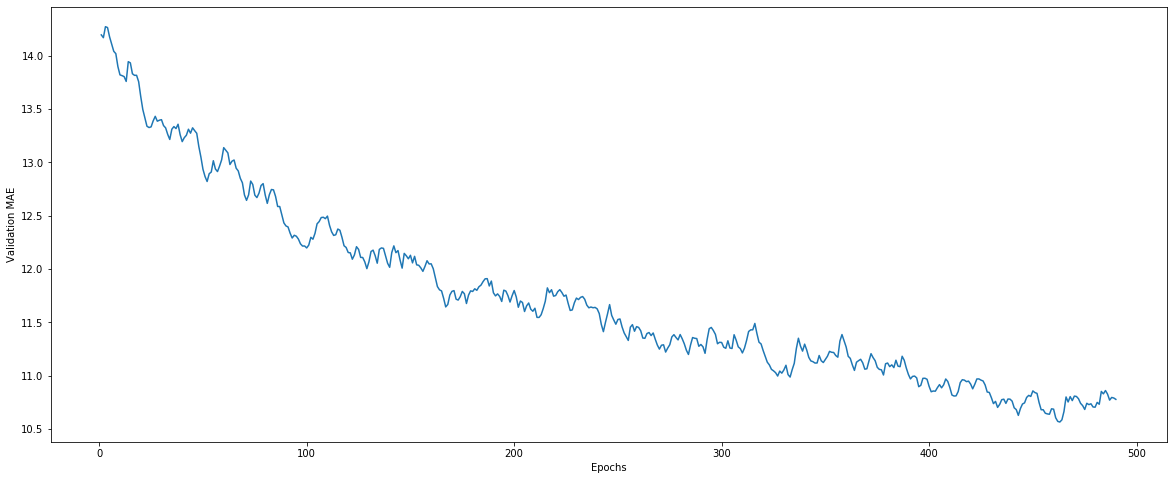

In [112]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Похоже пока не хватает знаний по оптимизации топологии и отдельных параметров сети. Результат LightGBM не достигнут. Более того мы видим, что показатели нейронной сети (функция потерь) не стремится к уменьшению. Вероятно выборка по данным должна быть больше. На данный момент мы асимптотически приближаемся к значению MAE в 10 градусов.

## Обучение LightGBM с временными признаками.

Разобьем на тренировочную/валидационную выборки

In [113]:
data_cleaned.columns

Index(['first_Время замера', 'first_Температура', 'last_Температура',
       'Активная работа', 'Реактивная работа', 'Полная работа', 'Газ 1',
       'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7',
       'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13',
       'Bulk 14', 'Bulk 15', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5',
       'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9', 'Wire 1_timedelta',
       'Wire 2_timedelta', 'Wire 3_timedelta', 'Wire 4_timedelta',
       'Wire 5_timedelta', 'Wire 6_timedelta', 'Wire 7_timedelta',
       'Wire 8_timedelta', 'Wire 9_timedelta', 'Bulk 1_timedelta',
       'Bulk 2_timedelta', 'Bulk 3_timedelta', 'Bulk 4_timedelta',
       'Bulk 5_timedelta', 'Bulk 6_timedelta', 'Bulk 7_timedelta',
       'Bulk 8_timedelta', 'Bulk 9_timedelta', 'Bulk 10_timedelta',
       'Bulk 11_timedelta', 'Bulk 12_timedelta', 'Bulk 13_timedelta',
       'Bulk 14_timedelta', 'Bulk 15_timedelta', 'Разница времени замера'],
      dtype='o

In [114]:
data_cleaned.columns = ['first_temp_measurement', 'first_temp', 'last_temp',
       'active_work', 'reactive_work', 'full_work', 'gas',
       'Bulk_1', 'Bulk_2',
       'Bulk_3', 'Bulk_4', 'Bulk_5', 'Bulk_6', 'Bulk_7', 'Bulk_8',
       'Bulk_9', 'Bulk_10', 'Bulk_11', 'Bulk_12', 'Bulk_13', 'Bulk_14',
       'Bulk_15', 'Wire_1', 'Wire_2', 'Wire_3', 'Wire_4', 'Wire_5',
       'Wire_6', 'Wire_7', 'Wire_8', 'Wire_9', 'Wire_1_timedelta',
       'Wire_2_timedelta', 'Wire_3_timedelta', 'Wire_4_timedelta',
       'Wire_5_timedelta', 'Wire_6_timedelta', 'Wire_7_timedelta',
       'Wire_8_timedelta', 'Wire_9_timedelta', 'Bulk_1_timedelta',
       'Bulk_2_timedelta', 'Bulk_3_timedelta', 'Bulk_4_timedelta',
       'Bulk_5_timedelta', 'Bulk_6_timedelta', 'Bulk_7_timedelta',
       'Bulk_8_timedelta', 'Bulk_9_timedelta', 'Bulk_10_timedelta',
       'Bulk_11_timedelta', 'Bulk_12_timedelta', 'Bulk_13_timedelta',
       'Bulk_14_timedelta', 'Bulk_15_timedelta', 'timedelta_temp_measurement']

data_cleaned

first_temp_measurement  first_temp  last_temp  active_work  \
key                                                               
1       2019-05-03 11:16:18      1571.0     1613.0  1207.804249   
2       2019-05-03 11:37:27      1581.0     1602.0   733.816470   
3       2019-05-03 12:13:17      1596.0     1599.0   443.583327   
4       2019-05-03 12:52:57      1601.0     1625.0   670.663327   
5       2019-05-03 13:23:19      1576.0     1602.0   997.496095   
...                     ...         ...        ...          ...   
2495    2019-08-06 00:35:45      1570.0     1591.0   626.167357   
2496    2019-08-06 01:02:54      1554.0     1591.0   727.868032   
2497    2019-08-06 01:41:53      1571.0     1589.0   427.535518   
2498    2019-08-06 02:03:49      1591.0     1594.0   629.928649   
2499    2019-08-06 02:40:25      1569.0     1603.0  1075.132183   

      reactive_work    full_work        gas  Bulk_1  Bulk_2  Bulk_3  ...  \
key                                                                  ...   
1        787.907510  1442.377754  29.749986     0.0     0.0     0.0  ...   
2        487.590677   881.233565  12.555561     0.0     0.0     0.0  ...   
3        280.936835   525.066777  28.554793     0.0     0.0     0.0  ...   
4        429.935932   796.911309  18.841219     0.0     0.0     0.0  ...   
5        664.940090  1199.137958   5.413692     0.0     0.0     0.0  ...   
...             ...          ...        ...     ...     ...     ...  ...   
2495     462.572488   778.818234   7.125735     0.0     0.0    21.0  ...   
2496     485.842067   875.261419   9.412616     0.0     0.0     0.0  ...   
2497     356.837023   556.930349   6.271699     0.0     0.0     0.0  ...   
2498     438.905595   767.817794  14.953657     0.0     0.0    90.0  ...   
2499     733.110945  1301.828445  11.336151     0.0     0.0    47.0  ...   

      Bulk_7_timedelta  Bulk_8_timedelta  Bulk_9_timedelta  Bulk_10_timedelta  \
key                                                                             
1                  0.0               0.0               0.0                0.0   
2                  0.0               0.0               0.0                0.0   
3                  0.0               0.0               0.0                0.0   
4                  0.0               0.0               0.0                0.0   
5                  0.0               0.0               0.0                0.0   
...                ...               ...               ...                ...   
2495               0.0               0.0               0.0               62.0   
2496               0.0               0.0               0.0              682.0   
2497               0.0               0.0               0.0                0.0   
2498               0.0               0.0               0.0               97.0   
2499               0.0               0.0               0.0                0.0   

      Bulk_11_timedelta  Bulk_12_timedelta  Bulk_13_timedelta  \
key                                                             
1                   0.0                0.0                0.0   
2                   0.0              173.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
5                   0.0                0.0                0.0   
...                 ...                ...                ...   
2495                0.0                0.0                0.0   
2496                0.0              223.0                0.0   
2497                0.0                0.0                0.0   
2498                0.0                0.0                0.0   
2499                0.0                0.0                0.0   

      Bulk_14_timedelta  Bulk_15_timedelta  timedelta_temp_measurement  
key                                                                     
1                   0.0                0.0                       861.0  
2                 173.0  

In [168]:
(data_cleaned_train,
 data_cleaned_test)= (train_test_split(data_cleaned,
                                              test_size=0.2, 
                                              random_state=124212))

(data_cleaned_tr, data_cleaned_val) = (train_test_split(data_cleaned_train, 
                                                                      test_size=0.2, 
                                                                      random_state=124212))
data_cleaned_train

first_temp_measurement  first_temp  last_temp  active_work  \
key                                                               
119     2019-05-07 17:23:50      1628.0     1593.0   159.140997   
1921    2019-07-16 01:35:51      1612.0     1597.0   442.154093   
2418    2019-08-03 07:02:38      1564.0     1575.0   588.103794   
2329    2019-07-30 23:59:39      1586.0     1600.0   978.437626   
2186    2019-07-26 04:39:37      1587.0     1591.0   299.757835   
...                     ...         ...        ...          ...   
965     2019-06-07 22:36:08      1561.0     1587.0   851.533296   
1125    2019-06-13 06:52:00      1595.0     1592.0   623.446548   
1211    2019-06-16 03:59:21      1583.0     1593.0   374.845779   
541     2019-05-23 08:18:50      1597.0     1592.0   679.164029   
1472    2019-06-25 14:19:13      1573.0     1592.0   438.059561   

      reactive_work    full_work        gas  Bulk_1  Bulk_2  Bulk_3  ...  \
key                                                                  ...   
119      126.500261   203.297045  17.875612    51.0   233.0     0.0  ...   
1921     351.120824   565.715564  15.753125     0.0     0.0    59.0  ...   
2418     379.349059   700.082724   6.370933     0.0     0.0     0.0  ...   
2329     741.668693  1227.815921   6.899465     0.0     0.0   103.0  ...   
2186     224.705625   374.666122   7.889760     0.0     0.0     0.0  ...   
...             ...          ...        ...     ...     ...     ...  ...   
965      603.224239  1044.309161   9.127801     0.0     0.0    49.0  ...   
1125     578.940771   851.025633   5.810964     0.0     0.0    23.0  ...   
1211     301.653717   481.201580   4.761801     0.0     0.0     0.0  ...   
541      504.558153   846.791421  12.139106     0.0     0.0     0.0  ...   
1472     319.562740   542.447844   4.827375     0.0     0.0    38.0  ...   

      Bulk_7_timedelta  Bulk_8_timedelta  Bulk_9_timedelta  Bulk_10_timedelta  \
key                                                                             
119                0.0               0.0               0.0                0.0   
1921               0.0               0.0               0.0                0.0   
2418               0.0               0.0               0.0                0.0   
2329               0.0               0.0               0.0                0.0   
2186               0.0               0.0               0.0                0.0   
...                ...               ...               ...                ...   
965                0.0               0.0               0.0                0.0   
1125               0.0               0.0               0.0                0.0   
1211               0.0               0.0               0.0                0.0   
541                0.0               0.0               0.0                0.0   
1472               0.0               0.0               0.0               41.0   

      Bulk_11_timedelta  Bulk_12_timedelta  Bulk_13_timedelta  \
key                                                             
119                 0.0                0.0                0.0   
1921                0.0              469.0                0.0   
2418                0.0                0.0                0.0   
2329                0.0                0.0                0.0   
2186                0.0               55.0                0.0   
...                 ...                ...                ...   
965                 0.0              104.0                0.0   
1125                0.0              223.0                0.0   
1211                0.0                0.0                0.0   
541                 0.0              185.0                0.0   
1472                0.0                0.0                0.0   

      Bulk_14_timedelta  Bulk_15_timedelta  timedelta_temp_measurement  
key                                                                     
119                 0.0                0.0                      1425.0  
1921              469.0  

In [169]:
data_cleaned_tr_feat = data_cleaned_tr.drop(columns = ['last_temp','first_temp_measurement'])
data_cleaned_tr_targ = data_cleaned_tr.last_temp

data_cleaned_val_feat = data_cleaned_val.drop(columns = ['last_temp','first_temp_measurement'])
data_cleaned_val_targ = data_cleaned_val.last_temp

display(data_cleaned_tr_feat)
display(data_cleaned_tr_targ)

first_temp  active_work  reactive_work    full_work        gas  Bulk_1  \
key                                                                            
618       1557.0   670.308488     564.997549   877.768045   5.996466     0.0   
72        1590.0   105.850812      84.544434   135.514480   3.377227     0.0   
1601      1582.0    45.951907      34.456663    57.437226   8.600071     0.0   
1993      1636.0   645.374577     552.021450   850.568837  14.645660     0.0   
354       1591.0  1808.429264    1458.821912  2323.933388  17.650582     0.0   
...          ...          ...            ...          ...        ...     ...   
1057      1589.0  1270.394980     990.795118  1611.947236  10.778868     0.0   
546       1553.0   998.297352     813.395844  1287.764498   5.489197     0.0   
1465      1550.0   522.945225     426.830919   675.833898  20.018412    31.0   
678       1611.0   128.932579      85.862639   154.972821   5.907560     0.0   
1860      1568.0   573.553631     411.483851   706.098732  10.239209     0.0   

      Bulk_2  Bulk_3  Bulk_4  Bulk_5  ...  Bulk_7_timedelta  Bulk_8_timedelta  \
key                                   ...                                       
618      0.0     0.0    21.0     0.0  ...               0.0               0.0   
72       0.0     0.0     0.0     0.0  ...               0.0               0.0   
1601     0.0     0.0     0.0     0.0  ...               0.0               0.0   
1993     0.0     0.0    88.0     0.0  ...               0.0               0.0   
354      0.0     0.0     0.0     0.0  ...               0.0               0.0   
...      ...     ...     ...     ...  ...               ...               ...   
1057     0.0     0.0     0.0     0.0  ...               0.0               0.0   
546      0.0     0.0     0.0     0.0  ...               0.0               0.0   
1465     0.0     0.0    67.0     0.0  ...               0.0               0.0   
678      0.0    51.0     0.0     0.0  ...               0.0               0.0   
1860     0.0   120.0     0.0     0.0  ...               0.0               0.0   

      Bulk_9_timedelta  Bulk_10_timedelta  Bulk_11_timedelta  \
key                                                            
618                0.0                0.0                0.0   
72                 0.0                0.0                0.0   
1601               0.0                0.0                0.0   
1993               0.0                0.0                0.0   
354                0.0                0.0              912.0   
...                ...                ...                ...   
1057               0.0              846.0                0.0   
546                0.0                0.0                0.0   
1465               0.0                0.0                0.0   
678                0.0                0.0                0.0   
1860               0.0                0.0                0.0   

      Bulk_12_timedelta  Bulk_13_timedelta  Bulk_14_timedelta  \
key                                                             
618                 0.0                0.0                0.0   
72                  0.0                0.0                0.0   
1601                0.0                0.0                0.0   
1993              222.0                0.0              222.0   
354               550.0                0.0               99.0   
...                 ...                ...                ...   
1057              164.0                0.0              164.0   
546                 0.0                0.0              126.0   
1465              479.0                0.0              479.0   
678               400.0                0.0              400.0   
1860                0.0                0.0                0.0   

      Bulk_15_timedelta  timedelta_temp_measurement  
key                                                  
618                 0.0                      1027.0  
72                  0.0                       465.0  
1601            

key
618     1593.0
72      1595.0
1601    1573.0
1993    1593.0
354     1598.0
         ...  
1057    1605.0
546     1587.0
1465    1585.0
678     1588.0
1860    1594.0
Name: last_temp, Length: 1580, dtype: float64

Далее загружаем данные и начинаем оптимизацию

In [170]:
%%time
HyperOpt_obj_time = HPOpt(data_cleaned_notime_tr_feat, 
                    data_cleaned_notime_val_feat,
                    data_cleaned_notime_tr_targ,
                    data_cleaned_notime_val_targ)

Wall time: 0 ns


In [174]:
%%time
lgbm_opt_time  =  HyperOpt_obj_time.process(fn_name='lgb_reg', 
                                  space=lgb_para, 
                                  trials=Trials(), 
                                  algo=tpe.suggest, 
                                  max_evals=20)

100%|█████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.15trial/s, best loss: 6.091892121558316]
Wall time: 3.9 s


In [175]:
optimum_params_lgbm_time = space_eval(lgb_clf_params, lgbm_opt_time[0])
optimum_params_lgbm_time

{'colsample_bytree': 0.8000000000000003,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 8,
 'n_estimators': 100,
 'subsample': 0.8342849289193094}

In [176]:
LGBMRegr_opt_time = LGBMRegressor(**optimum_params_lgbm_time)#random_state = 12345, 

In [179]:
%%time
LGBMRegr_opt_time.fit(data_cleaned_train.drop(columns = ['last_temp','first_temp_measurement']) , data_cleaned_train.last_temp)

Wall time: 122 ms


LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.8000000000000003, importance_type='split',
              learning_rate=0.2, max_depth=5, min_child_samples=20,
              min_child_weight=8, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.8342849289193094, subsample_for_bin=200000,
              subsample_freq=0)

In [180]:
mean_absolute_error(data_cleaned_test.last_temp,LGBMRegr_opt_time.predict(data_cleaned_test.drop(columns = ['last_temp','first_temp_measurement'])))

5.919015237594665

Ура! Это победа!

Итак, наилучшая метрика получилась равной `5,92`. Для качественной оценки нам пришлось внедрить в состав признаков время внесения компонентов в выплавляемую сталь. 

Ниже оценим важность вкладов признаков в итоговую оценку!

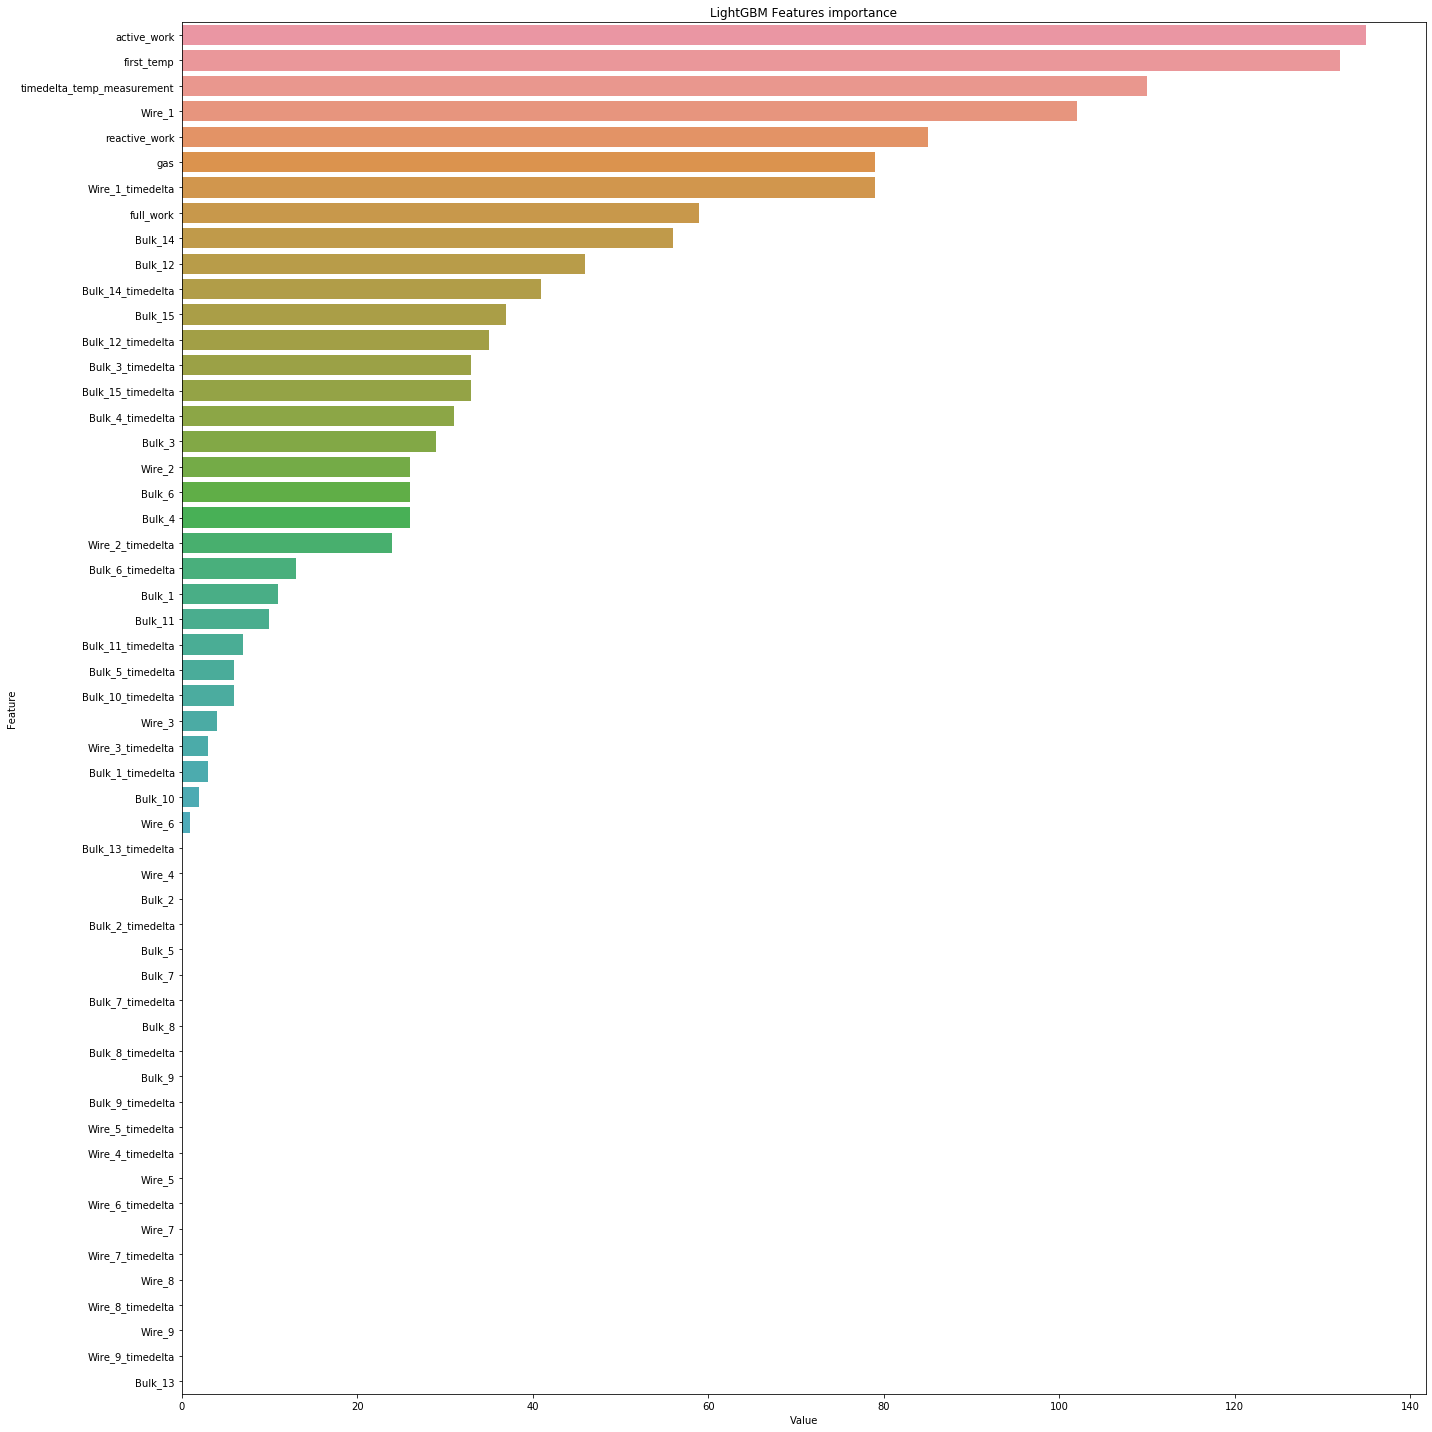

In [123]:
data_cleaned_train_feat = data_cleaned_train.drop(columns = ['last_temp','first_temp_measurement'])
feature_imp = pd.DataFrame(sorted(zip(LGBMRegr_opt_time.feature_importances_,data_cleaned_train_feat.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features importance')
plt.tight_layout()
plt.show()

Как мы видим, основными факторами, влияющими на температуру являются первичная температура, работа, и время замера температуры. В то время, как другие признаки (добавление различных компонент) не оказывают влияния. 
Отдельно еще рассмотрим мультиколлнеарность мощностей (работ).

C:\Users\pnedviga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


Активная мощность  Реактивная мощность
Активная мощность             1.000000             0.963182
Реактивная мощность           0.963182             1.000000

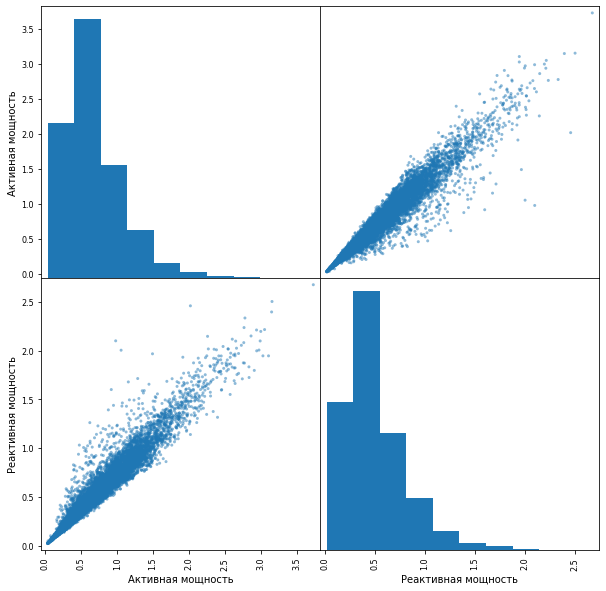

In [124]:
fig, ax = plt.subplots(figsize=(10,10))
pd.plotting.scatter_matrix(data_arc[['Активная мощность','Реактивная мощность']],ax=ax)

data_arc[['Активная мощность','Реактивная мощность']].corr()

C:\Users\pnedviga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhos

Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhos

active_work  reactive_work  full_work
active_work       1.000000       0.981442   0.997131
reactive_work     0.981442       1.000000   0.993066
full_work         0.997131       0.993066   1.000000

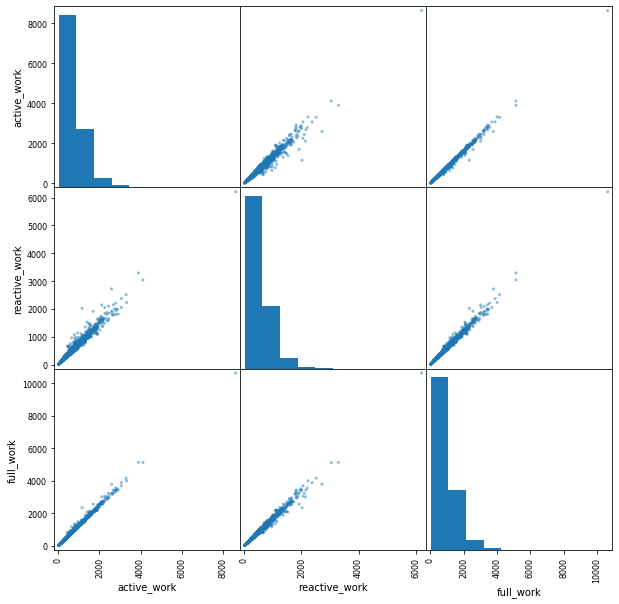

In [125]:
fig, ax = plt.subplots(figsize=(10,10))
pd.plotting.scatter_matrix(data_cleaned_train_feat[['active_work','reactive_work','full_work']],ax=ax)
data_cleaned_train_feat[['active_work','reactive_work','full_work']].corr()

Попробуем рассмотреть только "активную работу" как признак для обучения. Мы видим высокую корреляцию между признаками активной и реактивной мощности и, как следствие еще большую закоррелированность "активной", "реактивной" и "полной" работы. Я произведу переобучение модели на новом наборе признаков, оставив только "активную работу" из всей троицы. 

In [164]:
%%time
HyperOpt_obj_time_v2 = HPOpt(data_cleaned_tr_feat.drop(columns = ['reactive_work','full_work']), 
                            data_cleaned_val_feat.drop(columns = ['reactive_work','full_work']),
                            data_cleaned_tr_targ,
                            data_cleaned_val_targ)
lgbm_opt_time_v2 = HyperOpt_obj_time.process(fn_name='lgb_reg', 
                                              space=lgb_para, 
                                              trials=Trials(), 
                                              algo=tpe.suggest, 
                                              max_evals=100)

100%|███████████████████████████████████████████████| 100/100 [00:21<00:00,  4.61trial/s, best loss: 6.177385154116207]
Wall time: 21.7 s


In [165]:
optimum_params_lgbm_time_v2 = space_eval(lgb_clf_params, lgbm_opt_time_v2[0])
optimum_params_lgbm_time_v2

{'colsample_bytree': 0.8000000000000003,
 'learning_rate': 0.08,
 'max_depth': 26,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.8127569840157562}

In [166]:
%%time
LGBMRegr_opt_time_v2 = LGBMRegressor(**optimum_params_lgbm_time_v2)
LGBMRegr_opt_time_v2.fit(data_cleaned_train.drop(columns = ['last_temp',
                                                            'first_temp_measurement',
                                                            'reactive_work',
                                                            'full_work']) , data_cleaned_train.last_temp)

Wall time: 276 ms


LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.8000000000000003, importance_type='split',
              learning_rate=0.08, max_depth=26, min_child_samples=20,
              min_child_weight=1, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.8127569840157562, subsample_for_bin=200000,
              subsample_freq=0)

In [167]:
mean_absolute_error(data_cleaned_test.last_temp,
                    LGBMRegr_opt_time_v2.predict(data_cleaned_test.drop(columns = ['last_temp',
                                                                                   'first_temp_measurement',
                                                                                   'reactive_work',
                                                                                   'full_work'])))

6.059398685520258

Стало еще чуть лучше после удаления сильно закоррелированных признаков. Несколько проходов было сделано в данном контексте. 

Вообще еще возник вопрос: как эти признаки отыскивать и автоматически составлять список для "зачистки"?
И в связи с этим найдена [статья](https://medium.com/nuances-of-programming/пошаговое-построение-логистической-регрессии-в-python-a7c650ae77c2) и раздел в ней "Рекурсивное устранение признаков". Пока здесь не используем, но смотрим в этом направлении..:)

# 7. [Отчет о проделанной работе](#Content)<a id='Report'></a>

1. В ходе исследовательского анализа данных были выявлены основные отличительные особенности, характерные для данной задачи:
    - каждая плавка отделена от остальных характерным "ключом";
    - все параметры привязаны к данному ключу и времени;

2. Далее был составлен [план](#Plan). Основная часть пунктов выполнена как и планировалось:
    - Данные "склеены" из нескольких датасетов в один на базе "ключей";
    - Часть данных пришлось "выбросить", поскольку они не содержали основополагающих признаков: температуры на старте и окончании процесса;
    - Решено не рассматривать данные как временные ряды. Причина: один целевой признак и множество сопуствующих. Кроме того ряды подразумевают в себе использование соответствующих моделей на базе большого количества измерений через равные промежутки времени. Ничего подобного у нас нет. 
    - После объединения датасетов один объект (наблюдение) в данных стал эквивалентен отдельному ключу (плавке)
    - Основными признаками, влияющими на предсказания температуры оказались: 
        - изначальная температура;
        - "активная" работа, посчитанная на базе мощности и времени;
        - время окончательного замера температуры.
3. От подхода с использованием нейронных сетей пришлось отказаться как от не обеспечивающего высокую точность. Итоговая метрика не становилась менее 11. 
4. Трудности, встреченные и успешно разрешенные:
    - Сперва не ясно было, что сделать со временем. Позже решено было использовать его для "фильтрации" добавок в смесь, попавших в "диапазон" окна замеров; 
    - Время не стоит выкидывать, поскольку из него можно получить еще один полезный признак - отсчет времени от первого замера до любого события;
    - В конце работы сократил набор признаков, убрав мультиколлинеарные. Вообще стоит всегда анализировать данные на предмет "лишних" признаков.
    - Алгоритм Hyperopt помог найти оптимальный набор гиперпараметров, дающий наивысшую оценку.
5. Ключевыми шагами решения оказались:
    - EDA
    - Дотошный Feature engineering. Выкинуть лишние признаки + сформировать значимые. Как правило это возможно после подробного разбора технологической части рассматриваемого процесса
    - Выбор лучшей модели и ее тестирование
6. Итоговое качество `MAE = 5.92` для модели на базе `LightGBMRegressor`. Полносвязная нейронная сеть не приблизилась даже к десяти. Возможная причина: мало данных. Вероятно при обучении мы падаем в первый локальный минимум при минимизации функции потерь.